In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
from rasterio.features import rasterize
from rasterstats import zonal_stats
from sklearn.metrics import mean_squared_error as MSE
import pwlf
import math
from scipy import stats
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm
import statsmodels.formula.api as smf
from hydroeval import *
import xarray as xr
import pickle

def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
import warnings
warnings.filterwarnings("ignore")

years = [2016, 2017, 2018]
fl_path = '/home/pelto/Desktop/ice_flux/' + 'Nordic' + '/'
# ZS_df_2016 = pd.read_csv(fl_path+'ZS_2016.csv')
# ZS_df_2017 = pd.read_csv(fl_path+'ZS_2017.csv')
# ZS_df_2018 = pd.read_csv(fl_path+'ZS_2018.csv')

sVSTAKE=1.10; sVOFFice=1.1; sVCoreg=2.0; sVRAND=1.5
sVsys=np.sqrt((sVOFFice**2)+(sVCoreg)**2)
sVZ=np.sqrt((sVsys**2)+((sVRAND)**2))
sVZ

2.7313000567495327

In [ ]:
# obs = pd.read_csv(fl_path+ 'Nordic_bdot.csv') 
# obs = obs[(obs.Year>2015)&(np.logical_not(np.isnan(obs.Ba)))]#  obs.Ba_survey!=np.nan)]
# len(obs)/3

In [ ]:
# pd.set_option('display.max_columns', None)
# D[D.id==0]

In [ ]:
# df_agg.gpr[df_agg.distance==0.0]=0.0;df_agg.gpr[(df_agg.distance==df_agg.len)]=0.0;


# d=df_agg[(df_agg.id==2)&(df_agg.distance<570)]
# d.gpr[d.distance==0.0]=25. 
# dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # for f in range(len(dist)):
# #     df_agg.gpr[(df_agg.id==2)&(df_agg.distance==dist[f])]=fill[f]

# d=df_agg[(df_agg.id==2)&(df_agg.distance>1250)] ;
# dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # for f in range(len(dist)):
# #     df_agg.gpr[(df_agg.id==2)&(df_agg.distance==dist[f])]=fill[f]

# d=df_agg[(df_agg.id==2)&(df_agg.distance<1200)&(df_agg.distance>570)] ;
# dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 6); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # for f in range(len(dist)):
# #     df_agg.gpr[(df_agg.id==2)&(df_agg.distance==dist[f])]=fill[f]

In [ ]:
# d=D[(D.id==2)&(D.distance<570)]
# d.gpr[d.distance==0.0]=25. 
# dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==2)&(D.distance>1250)] ;
# dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

In [ ]:
# np.mean(ELA),np.mean(s_ELA)
# ELA

2016
VZ -ITS: 4.1570983
VZ DIFF ratio: 0.5327313
nan
nan
Mean Vel. vz 7.8 8.81
Mean Vel. ITS 3.65 2.45
Original vector layer projection:  epsg:32611
New vector layer projection (PROJ4):  epsg:32611


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector layer projection:  epsg:32611
New vector layer projection (PROJ4):  epsg:32611


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
2017
VZ -ITS: 4.779522
VZ DIFF ratio: 0.5983678
nan
nan
Mean Vel. vz 7.99 8.18
Mean Vel. ITS 3.21 2.59
Original vector layer projection:  epsg:32611
New vector layer projection (PROJ4):  epsg:32611


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector layer projection:  epsg:32611
New vector layer projection 

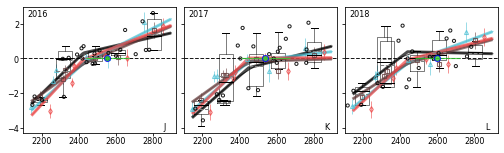

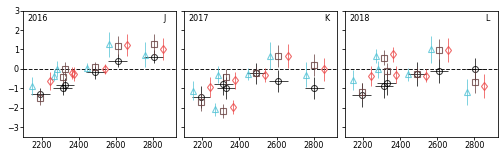

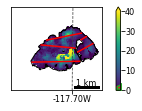

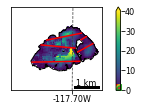

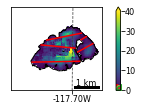

In [12]:
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
mfc='none'; mew=1.1; elw=0.9
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'; pylab.rcParams['ytick.major.pad']='1.'

fig1, ax1 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5))) #obs. and flux gate SMB boxplot/errorbar plot
fig2, ax2 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5))) ##mass conservation plot
count = 0

for yr in range(len(years)):
    # season
    balance = 'Ba'  # Bw or Ba (winter or annual)
    # rho_snow = 445. # 470 kg m-3 geodetic or 457 glaciological, or...take given years obs. value
    year = years[yr] # any of: 2016, 2017, 2018
    I = np.abs(year - 2016) # for selecting raster inputs

    gl = 3 # number to select glacier
    Glacier = ['Kokanee', 'Conrad', 'Illecillewaet', 'Nordic']
    glacier = ['kokanee', 'conrad', 'illecillewaet', 'nordic']
#     d = 20. #20.  #distance (m) between flux gate points
    Dint = 0.9 #depth integrated velocity ratio, 1.0= all sliding
    sVSTAKE=1.10; sVOFFice=1.8; sVCoreg=3.0; sVRAND=2.0
    sVsys=np.sqrt((sVSTAKE**2)+(sVOFFice**2))
    sVZ=np.sqrt((sVsys**2)+(sVRAND**2))
    sHopt = 0.078 #10.2 ## ME:10.2 m,  MAE:0.223 (percent ratio) 0.16 is 2x the ME of Conrad, Illec, Kokanee
    cb = 1 ##center bin use this to assure flux in is from both contributing bins 

    fl_path = '/home/pelto/Desktop/ice_flux/' + Glacier[gl] + '/'
    gpr_path = '/home/pelto/GIS/GPR/ComparisonData/'
    path = '/home/pelto/Desktop/lidar_cbt_analysis/' + glacier[gl] + '/'

    VDIR = 'ind'  # 'mosaic' or 'ind'
    ITS_LIVE = False
    firn = False
    fit= 'PW' #'PW' or 'LIN'
    
    if VDIR == 'ind':  
                    
        vf_list = ['nordic_vy_25m_2016.tif','nordic_vy_25m_2017.tif','nordic_vy_25m_2018.tif']
        vx_list = ['nordic_vx_25m_2016.tif','nordic_vx_25m_2017.tif','nordic_vx_25m_2018.tif']
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'
        ITS = fl_path + '/ITS_LIVE/'+str(year) + '_nordic_ITS_LIVE_32611.tif'
        print(year)
        VX = vdir+ vx_list[I]  #[:-15] + 'vx_25m.tif' 
        VY = vdir+ vf_list[I]
           # VM = vdir+ vf_list[I][:-14] + 'vm_25m.tif'
 
    else:
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'
        VX = vdir+ 'nordic_vx_25m_alldem.tif' 
        VY = vdir+ 'nordic_vy_25m_alldem.tif'
       
        ITS = fl_path + '/ITS_LIVE/nordic_ITS_LIVE_mosaic_32611.tif'
  
    topo = path + '20160912_nordic_dem1_SB.tif' #path + topo_list[I]
    
    farinotti = gpr_path + 'RGI60-02.04264_thickness.tif'

    dhA_list = ['nordic_2015_2016_dh_dt.tif',  'nordic_2017clone_2016_dh_dt.tif','nordic_2018_2017_dh_dt_52.tif']#'nordic_2016_2017_dh_dt.tif'
    if balance == 'Bw':
        dh_r = path+ dhW_list[I]   #winter height change TIFF
    else:
        dh_r = path+  dhA_list[I] #Annual height change TIFF
    
    SLOPE = '/home/pelto/GIS/DEM/Slope/NordicSlope180426_10m.tif'
    AAR = fl_path + 'nordic_firn_2012_2018.tif'
    pts_file = fl_path + 'gis/Nordic_pts_25m_wgs84.shp'   ##must be WGS84
    gates = fl_path + 'Nordic_flux_gates5.shp'  
    shpf = '/home/pelto/GIS/outlines/nordic_main__east_2014.shp'   
    bins=fl_path+Glacier[gl]+'_flux_bins_5gates.shp' #'_bins_2017_C'+'.shp' #_bins_2017_C  _bins
    obs = pd.read_csv(fl_path+ 'Nordic_bdot.csv') 
    rho = pd.read_csv(fl_path +  'RHO.csv') #'nordic_rho.csv')  ## MUST MATCH NUMBER OF BINS
    
    # open GeoTIFFs as arrays
    vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
    vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
    msk = salem.open_xr_dataset('/home/pelto/Desktop/lidar_cbt_analysis/nordic/nordic_total_msk.tif') 
    # msk = salem.open_xr_dataset('/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/bedem5_spm2/conrad_2016_ice_msk_5m_glacieronly.tif') 
    msk_gl = salem.open_xr_dataset(fl_path + 'nordic_2015_extent_5m.tif')

    gpr = salem.open_xr_dataset(fl_path + 'nordic_gpr_50_150m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
    farin = salem.open_xr_dataset(farinotti)

    H_opt = salem.open_xr_dataset(fl_path+'nordic_opt_OGGM_shift.tif')  #'opt_thick_251sw.tif') 
    gates = salem.read_shapefile(gates)
    
    gpr_reproj = vy.salem.transform(gpr);gpr = gpr_reproj.to_array(name='gpr')
    slope=salem.open_xr_dataset(SLOPE);slope_reproj = vy.salem.transform(slope);slope = slope_reproj.to_array(name='slope')
    aar=salem.open_xr_dataset(AAR);aar_reproj = vy.salem.transform(aar);aar = aar_reproj.to_array(name='aar')
    msk_reproj = vy.salem.transform(msk)  #note succeeding trying to use gdalwarp to go from 2955 --> 32611
    msk = msk_reproj.to_array(name='msk')
    msk_gl_reproj = vy.salem.transform(msk_gl);msk_gl = msk_gl_reproj.to_array(name='msk_gl')

    ITS = salem.open_xr_dataset(ITS); ITS_reproj = vy.salem.transform(ITS);ITS = ITS_reproj.to_array(name='ITS')
    
    # farin = farin.to_array(name='vx')
    H_opt_reproj = vy.salem.transform(H_opt);H_opt = H_opt_reproj.to_array(name='H_opt')

    farin_reproj= vy.salem.transform(farin);farin = farin_reproj.to_array(name='farin')
    srtm_corr = fl_path + 'nordic_SRTM_diff_30m.tif'
    srtm_corr = salem.open_xr_dataset(srtm_corr); srtm_corr = vy.salem.transform(srtm_corr)
    srtm_corr = srtm_corr.to_array(name='srtm_corr')
    srtm_corr.data[srtm_corr.data>10.0] = 0.0  ##remove positive anomalous values
    srtm_corr.data[srtm_corr.data<-30.0] = 0.0 ##remove negative anomalous values
           
    farin_corr = farin + srtm_corr;  farin_corr= farin_corr.rename('farin_corr')
    
    gpr.data[gpr.data<0.5] = np.nan; slope.data[slope.data<0.0]=np.nan #     vy.data[vy.data<0.01]=np.nan
    vz = vy; vz.data = np.sqrt(vx.data**2 + vz.data**2 )
    vz.data[msk_gl.data!=1.0] = np.nan;ITS.data[msk_gl.data!=1.0] = np.nan;
    vz=xr.DataArray(vz.data, coords=vz.coords, name='vz')
#     np.savetxt(), vz[0].data, delimiter=',')
    
    
    with open(fl_path+str(year)+'_vz.pkl', 'wb') as f:
        pickle.dump(vz[0].data, f)
    with open(fl_path+str(year)+'_ITS.pkl', 'wb') as f:
        pickle.dump(ITS[0].data, f)
#     vx.data[msk.data==0] = np.nan;vy.data[msk.data==0] = np.nan;VZ[msk_gl.data<0.0] = np.nan 
    VZ_off_ice = vz.copy(); VZ_off_ice.data[msk.data==1.0] = np.nan  
       
    DIFF = vz - ITS
    print("VZ -ITS:", np.nanmean(DIFF))
    print("VZ DIFF ratio:", np.nanmean(DIFF)/np.nanmean(vz))
    dh = salem.open_xr_dataset(dh_r); dh_reproj = vy.salem.transform(dh); dh = dh_reproj.to_array(name='dh')#dh.data[dh.data<1] = np.nan
    dh.data[dh.data>20.0] = 0.0 ;  dh.data[dh.data<-20.0] = 0.0 ##remove anomalous values
    dem = salem.open_xr_dataset(topo);dem_reproj = vy.salem.transform(dem); dem = dem_reproj.to_array(name='dem')
    dem.data[dem.data<1] = np.nan
    
    #     # map extent
    # grid = mercator_grid(center_ll=(-117.43, 51.238), extent=(4500, 4500)) ##zoomed out view
    # 487892.000 5509738.000 491232.000 5512358.000
    fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(cm2inch(5, 5))) 
    grid = vy.salem.grid  ##full view
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vz) #, label='m')
    sm.set_vmax(val=40.)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    off_ice_V = np.nanmean(VZ_off_ice)
    print(off_ice_V)
    print(np.nanstd(VZ_off_ice))
    print('Mean Vel. vz', round(np.nanmean(vz),2), round(np.nanstd(vz),2))
    print('Mean Vel. ITS', round(np.nanmean(ITS),2), round(np.nanstd(ITS),2))
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    sm.visualize()
    if ITS_LIVE == True:
        vel = 'ITS_LIVE'      
    else:
        vel = 'user'
    fig.savefig(fl_path+ 'products/'+ glacier[gl] +'VZ_'+ VDIR + '_' + vel+ '_' + str(year) +'.png', dpi=300)
#     fig.show()

    ## Functions for calculating zonal statistics over each flux gate bin
    # https://community.esri.com/groups/python-snippets/blog/2019/05/07/calculating-zonal-statistics-with-python-rasterstats
    # For loading shapefiles into geopandas dataframe

    def enum_items(source):
        print("\n")
        for ele in enumerate(source): 
            print(ele)

    def list_columns(df):
        field_list = list(df)
        enum_items(field_list)
        return field_list

    def loadshp_as_gpd(shp):
        data_shp = gpd.read_file(shp)
        return data_shp

    # For loading feature classes into geopandas dataframe
    def loadfc_as_gpd(fgdb):
        layers = fiona.listlayers(fgdb)
        enum_items(layers)
        index = int(input("Which index to load? "))
        fcgpd = gpd.read_file(fgdb,layer=layers[index])
        return fcgpd

    # For re-projecting input vector layer to raster projection
    def reproject(fcgpd, raster):
        proj = raster.crs.to_proj4()
        print("Original vector layer projection: ", fcgpd.crs)
        reproj = fcgpd.to_crs(proj)
        print("New vector layer projection (PROJ4): ", reproj.crs)
#         fig, ax = plt.subplots(figsize=(15, 15))
#         rplt.show(raster, ax=ax)
#         reproj.plot(ax=ax, facecolor='none', edgecolor='red')
#         fig.show()
        return reproj

    def dissolve_gpd(df):
        field_list = list_columns(df)
        index = 1 #int(input("Dissolve by which field (index)? "))
        dgpd = df.dissolve(by=field_list[index])
        return dgpd

    # For selecting which raster statistics to calculate
    def stats_select():
        stats_list = stats_list = ['min', 'max', 'mean', 'count', 
                  'sum', 'std', 'median', 'majority', 
                  'minority', 'unique', 'range']
        enum_items(stats_list)
    #     indices = input("Enter raster statistics selections separated by space: ")
        indices='2 3 5 6'
        stats  = list(indices.split())
        out_stats = list()
        for i in stats:
            out_stats.append(stats_list[int(i)])
        return out_stats

    def get_zonal_stats(vector, raster, stats):
        # Run zonal statistics, store result in geopandas dataframe
        result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
        geostats = gpd.GeoDataFrame.from_features(result)
        return geostats

    ## make an ice velocity quiver plot
#     fig, ax = plt.subplots(1,1,figsize=(10,10))
    df = salem.read_shapefile(pts_file) 
    df_file = loadshp_as_gpd(pts_file)
#     df_file.crs

    coords = np.array([p.xy for p in df.geometry]).squeeze()
    df['lon'] = coords[:, 0]; df['lat'] = coords[:, 1]

    # ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);
    xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
    df['x'] = xx; df['y'] = yy

    # shp_plt = reproject(df, VX)

    X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
    U = vx.data[0]; V = vy.data[0]

    vns = ['vx','vy','vz', 'ITS', 'gpr','H_opt','dem','farin_corr','dh','slope']

    M = xr.merge([vx,vy,vz,ITS,gpr,H_opt,dem,farin_corr,dh,slope])

    for vn in vns:
        df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

    df_agg = df[['id', 'len', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
    ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
    df_agg['i'] = ii; df_agg['j'] = jj
    # # We trick by creating an index of similar i's and j's
    # df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
    df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
    df_agg = df_agg.groupby('ij').mean()

    # Select
    for vn in vns:
    #     M_maksed = np.ma.masked_invalid(M[vn][0])
    #     df_agg[vn] = .interp(x=('z', df_agg.i), y=('z', df_agg.j))
        df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))  
    df_test = df_agg.copy()
    #add in missing IPR data
    D = df_agg[['id', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'vz','ITS', 'gpr', 'slope','H_opt', 'dem', 'farin_corr']].copy()  
    #D['vz'] = np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 )
    D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
    # fill any missing vel. direction
    for i in range(len((D))):   
        if np.isnan(D.vzdir[i])==True:
            G=D.id[i];V=np.nanmedian(D.vzdir[D.id==G]) 
            D.vzdir[i]=V
    
    ### fill in velocity nan at edges
    for i in range(D.id.nunique()):
        d=D[(D.id==i)&(D.distance<100)]
        dist=d.distance[np.isnan(d.vz)].values;
        if len(dist) > 0:
            x=d.distance[np.logical_not(np.isnan(d.vz))].values;y=d.vz.values; y=y[np.logical_not(np.isnan(y))]
            coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
            new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
            for f in range(len(dist)):
                D.vz[(D.id==i)&(D.distance==dist[f])]=fill[f] 
        d=D[(D.id==i)&(D.distance>(D.len - 100))]
        dist=d.distance[np.isnan(d.vz)].values;# print(len(dist))
        if len(dist) > 0:
            x=d.distance[np.logical_not(np.isnan(d.vz))].values;y=d.vz.values; y=y[np.logical_not(np.isnan(y))]
            coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
            new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
            for f in range(len(dist)):
                D.vz[(D.id==i)&(D.distance==dist[f])]=fill[f] 

    ##### correct ice thickness for thinning ##############  
    DH=[]

    D1=D.copy(); D1.reset_index(inplace=True,drop=True);DH=[]
    for i in range(len(D1)):
        fl_id=D1.loc[i].id
        if year == 2016:
            del_h = 0.0
        elif year == 2017:
            del_h=new16.loc[fl_id].dh_med
        elif year == 2018:
            del_h=new16.loc[fl_id].dh_med + new17.loc[fl_id].dh_med
        DH.append(del_h)
    D['DH']=DH #used to correct ice thickness for surface height change due to mass loss
    D.H_opt = D.H_opt + D.DH;D.gpr = D.gpr + D.DH ;D.farin_corr = D.farin_corr + D.DH
    D.H_opt[D.H_opt<0.] = 0.0;D.gpr[D.gpr<0.] = 0.0; D.farin_corr[D.farin_corr<0.] = 0.0
    ##### end correct ice thickness for thinning ############## 
    
    D.distance[(D.id==0)&(D.distance==1611)]=1622
    D.gpr[D.distance==0.0]=0.0;D.gpr[(D.distance==D.len)]=0.0; D.gpr[(D.distance==823.)]=0.0;
    D.H_opt[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.H_opt[(D.distance==D.len)]=0.0;
    D.farin_corr[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.farin_corr[(D.distance==D.len)]=0.0;
   
    d=D[(D.id==0)&(D.distance>600)&(D.distance<1700)] ;dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==0)&(D.distance==dist[f])]=fill[f]
        
    d=D[(D.id==1)&(D.distance>850)] ;
    dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==1)&(D.distance<500)] ;
    dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]
        
    d=D[(D.id==2)&(D.distance<570)]
    d.gpr[d.distance==0.0]=25. 
    dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==2)&(D.distance>1250)] ;
    dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==3)]
    d.gpr[(d.distance>290)&(d.distance<330)]= np.nan;dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==4)&(D.distance<600)] ;
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==4)&(D.distance>600)] ;
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

    D_all=D.copy()
    if ITS_LIVE == True:
        D['vfg'] = D.ITS
    else:
         #multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
        D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.))) #velocity normal to gate per slice
#     D.to_csv(fl_path+ glacier[gl]+ 'D_test.csv')
  
    with open(fl_path + str(year)+'_Dvfg.pkl', 'wb') as f:
        pickle.dump(D.vfg.values, f)

    D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 
    
    for n in range(D.id.nunique()):

        for c in range(len(D.id[D.id==n])): #.count()-1)#range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:  ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c]
                G= L * D.H_opt[D.id==n][c+1]*0.5;J= L * D.farin_corr[D.id==n][c+1]*0.5 #area of triangle
                 
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2
                G= L * D.H_opt[D.id==n][c]; J= L * D.farin_corr[D.id==n][c]
                 
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
                G= L * D.H_opt[D.id==n]; J= L * D.farin_corr[D.id==n]
                
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])
                G= L * D.H_opt[D.id==n][c-1]*0.5; J= L * D.farin_corr[D.id==n][c-1]*0.5 #area of triangle
                
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G=L* D.H_opt[D.id==n][c] ; J=L* D.farin_corr[D.id==n][c]  
                
            D.loc[idx,'A_Hopt']= G;D.loc[idx,'A_farin']= J; D.loc[idx,'Len_mod']= L     
    D_all=D.copy()
    if year == 2016:
        with open(fl_path + str(year)+'_D.pkl', 'wb') as f:
            pickle.dump(D, f)
    D['Qopt'] = D.A_Hopt * (D.vfg) * Dint;D['Qfarin'] = D.A_farin * (D.vfg) * Dint    

    ### Uncertainties
    D['sQout'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_low'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*0.80) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_high'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*1.00) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQoutF'] = np.sqrt((sVZ * D.A_farin)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.farin_corr))**2)

    # D['sQout'] = np.sqrt((sVZ**2) * ((D.H_opt**2 + (sHopt*D.H_opt)**2) * (D.vfg*Dint)**2) * d**2)
    # D['sQoutF'] = np.sqrt((sVZ**2) * ((D.farin_corr**2 + (sHopt*D.farin_corr)**2) * (D.vfg*Dint)**2) * d**2)

    Q_out= [0.,] #flux out per gate
    cr_area = [0.,] # cross-section area per gate
    vzdir = [0.,]; sQout= [0.,];sQout_low= [0.,];sQout_high= [0.,];vfg_all=[];gate_elev=[];v_gate_mean=[0.,];
    HF=[0.,];Hopt=[0.,];gate_width=[0.,];Len_mod=[0.,];GPR=[0.,]
    DV= D.copy(); DV = DV.dropna(subset=['vfg'])
    
    for n in range(D.id.nunique()):
        vfg_all.append(DV.vfg[DV.id==n])
        gate_elev.append(D.dem[D.id==n].mean())
        
####### calculate flux per bin by summing slices #######
    for n in range(D.id.nunique()+1):
            Q_out.append(D.Qopt[D.id==n].sum()) ; cr_area.append(D.A_Hopt[D.id==n].sum())
            vzdir.append(D.vzdir[D.id==n].mean()); GPR.append(D.gpr[D.id==n].mean())
            sQout.append(D.sQout[D.id==n].sum());sQout_low.append(D.sQout_low[D.id==n].sum()); sQout_high.append(D.sQout_high[D.id==n].sum()) 
            v_gate_mean.append(D.vfg[D.id==n].mean()); Hopt.append(D.H_opt[D.id==n].mean()); 
            gate_width.append(D.len[D.id==n].max()); Len_mod.append(D.Len_mod[D.id==n].sum())
    Q_in = [Q_out[1:]]; 
    sQin = [sQout[1:]+ [0.0]] ##1.0 instead of zero to prevent uncertainty nan
    sQin_low = [sQout_low[1:]+ [0.0]];sQin_high = [sQout_high[1:]+ [0.0]]    
    Q_in = np.squeeze(Q_in);sQin = np.squeeze(sQin);sQin_low = np.squeeze(sQin_low);sQin_high = np.squeeze(sQin_high)
    

    Q_outF= [0.,] #flux out per gate
    cr_areaF = [0.,]; sQoutF = [0.,]
    for n in range(D.id.nunique()+1):
            Q_outF.append(D.Qfarin[D.id==n].sum()) 
            cr_areaF.append(D.A_farin[D.id==n].sum()) 
            sQoutF.append(D.sQoutF[D.id==n].sum())
            HF.append(D.farin_corr[D.id==n].mean())

    Q_inF = [Q_outF[1:]] #flux in per bin
    Q_inF = np.squeeze(Q_inF)
    sQinF = [sQoutF[1:]+ [0.0]]
    sQinF = np.squeeze(sQinF)

    FG = pd.DataFrame(list(zip(Q_out, Q_in, cr_area, sQout, sQout_low, sQout_high, sQin, sQin_low, sQin_high, Q_outF, Q_inF, sQoutF, sQinF, cr_areaF, vzdir, 
           v_gate_mean, gate_width, GPR, Hopt, HF,Len_mod)), columns=['Q_out', 'Q_in', 'cr_area', 'sQout', 'sQout_low', 'sQout_high', 'sQin', 'sQin_low', 'sQin_high','Q_outF', 'Q_inF',
            'sQoutF', 'sQinF', 'cr_areaF', 'vzdir', 'v_gate_mean','gate_width', 'gpr','Hopt','HF','Len_mod']) 

    FG.loc[cb, 'Q_in'] = FG.Q_out[cb+1]+ FG.Q_out[4] ## Q_in for cb (center bin)
    FG.loc[cb, 'Q_inF'] = FG.Q_outF[cb+1]+ FG.Q_outF[4] ## Q_in for cb (center bin)
    FG.loc[(3), 'Q_in'] = 0.0 ;FG.loc[(3), 'Q_inF'] = 0.0  ## set Q_in to zero (one to prevent uncertainty nan) for top of main stem wing
    FG.loc[(5), 'Q_in'] = 0.0 ;FG.loc[(5), 'Q_inF'] = 0.0  ## set Q_in to zero (one to prevent uncertainty nan) for top of  east wing
    
    FG['vel_fg'] = FG.Q_out / FG.cr_area #net velocity per gate
    FG['vel_fgF'] = FG.Q_outF / FG.cr_area
    FG['bin']=np.arange(0,len(range(D.id.nunique()+1)),1)
    # FG['sQnet_opt'] = np.sqrt(FG.sQopt**2 + FG.sQin**2)

    FG['spQout'] = FG.sQout / FG.Q_out * 100. #%err on flux
    FG['spQin'] = FG.sQin / FG.Q_in * 100. #%err on flux
    FG['spQoutF'] = FG.sQoutF / FG.Q_outF * 100. #%err on flux
    FG['spQinF'] = FG.sQinF / FG.Q_inF * 100. #%err on flux

    ### import data per bin: height change, elevation, surface area, obs.SMB etc. 

    FG_df = FG.copy(); dem_r = topo;vel_r = VY; shp = loadshp_as_gpd(bins)

    rasters = [dh_r, dem_r]; names = ['dh','dem']# vel_r,SLOPE,AAR  ,'vy','slope', 'aar']
    for i in range(len(rasters)):
        raster = rasters[i]
        rst = rasterio.open(raster)
        shp = reproject(shp, rst) #shp is in correct projection, trying anyway for calculation
        # dhdt= vx.salem.transform(dhdt)
        name = names[i]
    #     shp_vec = dissolve_gpd(shp)  ## only if more columns exist
        stat = stats_select()  #'['min', 'max', 'mean', 'count', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range']
        
        ZS = (get_zonal_stats(shp, raster, stat))
        ZS.drop(['geometry'], axis=1, inplace=True)
        ZS.rename(columns={"mean": name+"_mean", "median":name+"_med", "std": name+"_std", "count":name+"_count"}, inplace=True)
        ZS.sort_values(by=['bin'],ascending=True, inplace=True)
        ZS.set_index('bin', inplace=True)
        FG_df =  pd.concat([FG_df, ZS], axis=1)

    rho.sort_values(by='bin',ascending=True, inplace=True) # sort by bin
    rho.set_index('bin', inplace=True) # set bin as index for sorting
    FG_df =  pd.concat([FG_df, rho], axis=1)

    WR= np.array(FG_df.dem_count[1:])
    WR= np.append(WR,[0]) # calculate area of flux in (area of bin above a given bin)

    FG_df['Q_net'] = FG_df.Q_in - FG_df.Q_out  #net flux per gate
    FG_df['Q_netA']= FG_df.Q_net / FG_df.dem_count

    FG_df['Q_netF'] = FG_df.Q_inF - FG_df.Q_outF  #net flux per gate
    FG_df['Q_netAF']= FG_df.Q_netF / FG_df.dem_count

    FG_df['area_Qin']= WR
    FG_df.loc[cb, 'area_Qin'] = FG_df.dem_count[cb+1]+ FG_df.dem_count[4]

    FG_df['sQoptA'] = FG_df.sQout / FG_df.dem_count
    FG_df['sQoptA_low'] = FG_df.sQout_low / FG_df.dem_count;FG_df['sQoptA_high'] = FG_df.sQout_high / FG_df.dem_count    
    FG_df['sQ_inA'] = FG_df.sQin / (FG_df.area_Qin+0.001)
    FG_df['sQ_inA_low'] = FG_df.sQin_low / (FG_df.area_Qin+0.001);FG_df['sQ_inA_high'] = FG_df.sQin_high / (FG_df.area_Qin+0.001)
    FG_df['sQnetA_opt'] = np.sqrt(FG_df.sQoptA**2 + FG_df.sQ_inA**2)
    FG_df['sQnetA_opt_low'] = np.sqrt(FG_df.sQoptA_low**2 + FG_df.sQ_inA_low**2);FG_df['sQnetA_opt_high'] = np.sqrt(FG_df.sQoptA_high**2 + FG_df.sQ_inA_high**2)

    FG_df['sQoutFA'] = FG_df.sQoutF / FG_df.dem_count
    FG_df['sQ_inFA'] = FG_df.sQinF / (FG_df.area_Qin+0.001)
    FG_df['sQnetFA'] = np.sqrt(FG_df.sQoutFA**2 + FG_df.sQ_inFA**2)

    ##calculate height change due to mass balance for highest bins considering firn compaction
    if firn == False:
        FG_df.Vfirn = 0.00
    FG_df['b_fg_h'] = FG_df.dh_med - FG_df.Q_netA + FG_df.Vfirn
    FG_df['b_fg_hF'] = FG_df.dh_med - FG_df.Q_netAF + FG_df.Vfirn
    FG_df.column_depth = FG_df.column_depth * FG_df.firn_area ## adjust firn column height for firn area
    FG_df['RHO'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.Hopt-FG_df.column_depth)))/ FG_df.Hopt
    FG_df['RHO_F'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.HF-FG_df.column_depth)))/ FG_df.HF 
    FG_df.loc[0, 'RHO'] = 910.;FG_df.loc[0, 'RHO_F'] = 910.
    
    if balance == 'Bw':
        FG_df['b_fg_we'] = FG_df.rho_snow/1000 * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df.rho_snow/1000 * FG_df.b_fg_hF
    else:
        FG_df['b_fg_we'] = FG_df['RHO']/1000. * FG_df.b_fg_h           #FG_df['rho_%s'%year]/1000. * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df['RHO_F']/1000. * FG_df.b_fg_hF

    ### Uncertainties
    #sDHdt = 0.21 #0.04 #m Bias dh from Pelto et al. 2019
    if I==0:
        sDHdt = 0.16 #0.14 #0.04 #m Bias dh from Pelto et al. 2019
    if I==1:
        sDHdt = 0.28
    elif I==2:
        sDHdt = 0.30
    sVfirn = 0.10
    sRHO = 0.10 #0.05 # percent uncertainty in density

    FG_df['sDH_opt'] = np.sqrt(sDHdt**2 + (FG_df.sQnetA_opt)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_opt'] = np.sqrt((FG_df.sDH_opt * (FG_df['RHO']/1000.))**2+
                   (FG_df.b_fg_h * (FG_df['RHO']/1000.*sRHO))**2)

    FG_df['sDH_F'] = np.sqrt(sDHdt**2 + (FG_df.sQnetFA)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_F'] = np.sqrt((FG_df.sDH_F * (FG_df['RHO_F']/1000.))**2+
                   (FG_df.b_fg_hF * (FG_df['RHO_F']/1000.*sRHO))**2)
    D['Agpr']=np.NaN;D.gpr[D.len==0.]=np.nan;  #D.gpr[D.id==6]=np.nan;
    D.gpr[(D.id==6)]=0.0 ## &(D.distance==0.0)temp. add false point to avoid instability
    D = D.dropna(subset=['gpr']); D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 

    for n in range(D.id.nunique()):

        for c in range(len(D.id[D.id==n])): #.count()-1)#range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:  ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c]
                G= L * D.gpr[D.id==n][c+1]*0.5;J= L * D.farin_corr[D.id==n][c+1]*0.5 #area of triangle
                 
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2
                G= L * D.gpr[D.id==n][c]; J= L * D.farin_corr[D.id==n][c]
                 
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
                G= L * D.gpr[D.id==n]; J= L * D.farin_corr[D.id==n]
                
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])
                G= L * D.gpr[D.id==n][c-1]*0.5; J= L * D.farin_corr[D.id==n][c-1]*0.5 #area of triangle
                
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G=L* D.gpr[D.id==n][c] ; J=L* D.farin_corr[D.id==n][c]  
                
            D.loc[idx,'Agpr']= G; D.loc[idx,'Len_gpr']= L 
    #         D['Q_gpr'] = (D.vfg * 0.9 *D['Agpr'])
    #     D['A'] = D.vfg[D.id==n] * D.gpr[D.id==n]

    #calculate flux out using GPR thicknesses
    sGPR = 0.10 #0.0516 #gpr error %
    D['sInterp_gpr'] = np.nan
    for n in range(len(D.Len_gpr)):
        if D.Len_gpr[n] > 50.:
            D.sInterp_gpr[n] = D.gpr[n] * 0.10  
        else: 
            D.sInterp_gpr[n] = 0.0
    sH_gpr = np.sqrt(D.sInterp_gpr**2+ (D.gpr*sGPR)**2)

    D['Qo_gpr'] = D.Agpr * (D.vfg) * Dint#* 0.9
    D['sQo_gpr'] =  np.sqrt((sVZ * (D.gpr) * D.Len_gpr)**2 + ((D.vfg*Dint) * D.Len_gpr * (sH_gpr))**2)

    # D['sQo_gpr'] = np.sqrt((sVZ**2) * ((D.gpr**2 + (sH_gpr)**2) * (D.vfg*Dint)**2) * d**2)

    Qo_gpr = [0.,] #flux out per gate
    cr_area_gpr = [0.,] # cross-section area per gate
    vzdir_gpr = [0.,];  sQo_gpr= [0.,]; Len_gpr=[0.,]
    for n in range(D.id.nunique()):  #for n in D.id.unique(): the id's are out of order here
            Qo_gpr.append(D.Qo_gpr[D.id==n].sum()) 
            cr_area_gpr.append(D.Agpr[D.id==n].sum())
            vzdir_gpr.append(D.vzdir[D.id==n].mean())
            sQo_gpr.append(D.sQo_gpr[D.id==n].sum())
            Len_gpr.append(D.Len_gpr[D.id==n].sum())
    Qin_gpr = [Qo_gpr[1:]+ [0.0]] #flux in per bin, add zero to end for top bin 
    Qin_gpr = np.squeeze(Qin_gpr); sQin_gpr = [sQo_gpr[1:]+ [0.0]]; sQin_gpr = np.squeeze(sQin_gpr)

    FG_gpr = pd.DataFrame(list(zip(Qo_gpr, Qin_gpr, cr_area_gpr, sQo_gpr,sQin_gpr,Len_gpr)), 
                          columns=['Qo_gpr', 'Qin_gpr', 'cr_area_gpr', 'sQo_gpr','sQin_gpr','Len_gpr']) 
    FG_gpr['bin'] = np.arange(0,len(range(D.id.nunique()+1)),1)#[0,1,2,3]
    # FG_gpr['vfg'] = FG_gpr.Qo_gpr / FG_gpr.cr_area_gpr #net velocity per gate
    # FG['bin']=np.arange(0,14,1)

    FG_gpr.loc[cb, 'Qin_gpr'] = FG_gpr.Qo_gpr[cb+1]+ FG_gpr.Qo_gpr[4] #flux in for center bin
    FG_gpr.loc[(3), 'Qin_gpr'] = 0.0  ## set Q_in to zero for top of main stem
    FG_gpr.loc[(5), 'Qin_gpr'] = 0.0  ## set Q_in to zero for top of east wing
    
    FG_gpr['spQo_gpr'] = FG_gpr.sQo_gpr / FG_gpr.Qo_gpr * 100. #%err on flux
    FG_gpr['spQin_gpr'] = FG_gpr.sQin_gpr / FG_gpr.Qin_gpr * 100. #%err on flux

    FG_all = FG_df.merge(FG_gpr, how='left') #on='bin')  
    FG_all['Q_net_gpr'] = FG_all.Qin_gpr - FG_all.Qo_gpr 

    FG_all['Q_netA_gpr']= FG_all.Q_net_gpr / FG_all.dem_count 
    FG_all['b_fg_h_gpr'] = FG_all.dh_med - FG_all.Q_netA_gpr+ FG_all.Vfirn #dh1516_mean
    
    FG_all['sQoutA_gpr'] = FG_all.sQo_gpr / FG_all.dem_count
    FG_all['sQ_inA_gpr'] = FG_all.sQin_gpr / (FG_all.area_Qin+0.001)
    FG_all['sQnetA_gpr'] = np.sqrt(FG_all.sQoutA_gpr**2 + FG_all.sQ_inA_gpr**2)

    FG_all['RHO_g'] = ((FG_all.column_density * FG_all.column_depth) + (910. * (FG_all.gpr-FG_all.column_depth)))/ FG_all.gpr; 
    FG_all.loc[0, 'RHO_g'] = 910.
    if balance == 'Bw':
        FG_all['b_fg_we_gpr'] = FG_df.rho_snow/1000. * FG_all.b_fg_h_gpr
    else:
        FG_all['b_fg_we_gpr'] = FG_all['RHO_g']/1000. * FG_all.b_fg_h_gpr
    
    #FG_all.loc[len(FG_gpr)-1,'b_fg_we_gpr'] = np.nan #no radar data available for flux calculation for top bin
    
    FG_all['sDH_gpr'] = np.sqrt(sDHdt**2 + (FG_all.sQnetA_gpr)**2 + (FG_all.Vfirn*sVfirn)**2)
    FG_all['sBwe_gpr'] = np.sqrt((FG_all.sDH_gpr * (FG_all['RHO_g']/1000.))**2+
                   (FG_all.b_fg_h_gpr * (FG_all['RHO_g']/1000.*sRHO))**2)

    n = 0;    a = 0.7; s= 10 #markersize
    obs=obs[(obs.Year==year)]
    obs.reset_index(inplace=True)
    
    obs = obs.dropna(subset=['Ba'])
    y_ax_obs=obs[(obs.Year==year)].Ba
    x_ax_obs=obs[(obs.Year==year)].Elev

    new = FG_all.copy()    
    yerr = [0.0, new.sBwe_gpr, new.sBwe_opt, new.sBwe_F] #new.sBwe_gpr
    new['xerr'] = new.dem_std * 1.5 #2 std dev -- 95% of data
    xerr = new.xerr 
  
    x_ax_fg_gpr=new.dem_med;y_ax_fg_gpr=new.b_fg_we_gpr
    x_ax_fg_opt=new.dem_med;y_ax_fg_opt=new.b_fg_we;x_ax_fg_F=new.dem_med ;y_ax_fg_F=new.b_fg_weF
    x = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt, x_ax_fg_F]
    y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt, y_ax_fg_F]
    
    letter=['J','K','L']
    color = ['k', '#51c2d5','#663f3f','#ec4646'] #'teal', '#74c476', '#238b45']
#     label = ['Obs.', 'Fg IPR', 'Fg OGGM','Farinotti']
    label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
    sym = ['o', '^', 's', 'd']
    # Call function to create error bars 
    shift = [-50,0,50]
    ax1[count].scatter(x[0],y[0],color=color[0], label=label[0], alpha=a+.2, s=s,facecolor='', zorder=3)
    for i in range(3):
        ax1[count].errorbar((x[i+1]+shift[i]), y[i+1], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], ecolor=color[i+1], zorder=2,
                              label=label[i+1], alpha=0.8, mfc=mfc, mew=mew, c=color[i+1], ms=4, elinewidth=0.7) #elinewidth=0.7

        ## plot data and regression lines
    ytxt = [0.2, 0.15, 0.1, 0.05]     
        
#         ax1[count].text(0.2, ytxt[i], txt[i]+str(np.round(1000*rlm_results.params[1],2))+ ' +/- ' + 
#                 str(np.round(1000*stdE,2)), transform=ax1[count].transAxes)        
        
#         slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x[i]),np.array(y[i]))
    txt= ['Observed', 'FG IPR     ', 'FG OGGM   ', 'FG Farinotti']

    if balance == 'Ba':
        ax1[count].axhline(linewidth=1, color='k', ls='--', alpha=a+.2, zorder=0)
        ax2[count].axhline(linewidth=1, color='k', ls='--', alpha=a+.2, zorder=0)

    ############ obs data box plot ################
    obs_data=obs[(obs.Year==year)]
    obs_data.reset_index(inplace=True)
    if year == 2017:
        obs_data[balance]= obs_data[balance]-0.32 ## GPS survey correction between LiDAR 9-17-2017 and field 9-8-2017
    bin_size = 100.
    z_range = np.arange(2000., 3250., bin_size)

    i = 0
    # for n in range(len(obs_data.Ba)):
    Z_F = []; Zor_F= []; OB_F=[]

    for z in z_range: 
        W=0;bin_size = 100.; COU=1
        while W==0:
            OBS = [];Z = [];Zor = [];
            for n in range(len(obs_data[balance])):
                if ((z - bin_size/2.) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (z + bin_size/2.)):
                    O = obs_data[balance][n]
                    Z.append(z);Zor.append(obs_data.Elev[n]);OBS.append(O)

            if len(OBS)<2:
                bin_size=bin_size*(1+(.2*COU))
                COU=COU+1
            else:
                OB_F.append(np.array(OBS)); Z_F.append(np.array(Z));  Zor_F.append(np.array(Zor))
                W=1
        i += 1
        
##################Difference###########################################################
       
    GPR = [];OPT = [];FAR = []  
    for z in z_range:
        W=0; COU=1;bin_size = 100.
        while W==0:
            GG=[];PP=[];FF=[]
            ####collect balance values for each elevation bin
            for n in range(len(new.dem_mean)): #for n in new.bin:  # 
                if ((z - bin_size/2.) <= new.dem_mean[n]) and (new.dem_mean[n] <=  (z + bin_size/2.)):
                    G = new.b_fg_we_gpr[n]
                    P = new.b_fg_we[n]
                    F = new.b_fg_weF[n]
                    GG.append(G);FF.append(F);PP.append(P)
            GG=np.array(GG)
            GG = GG[np.logical_not(np.isnan(GG))]
            
            if len(GG)<1:
                bin_size=bin_size*(1+(0.1*COU))
                COU=COU+1
                
            else:
                GPR.append(GG);OPT.append(np.array(PP));FAR.append(np.array(FF))
                W=1

    if count == 0:
        gpr_bdiff=[];opt_bdiff=[];farin_bdiff=[];z_range_all=[];obs_all=obs_data;obs_bin_all=[];gpr_all=[];
        opt_all=[];farin_all=[];elev_all=[];elev_gpr_all=[];gpr_bin_all=[];opt_bin_all=[];farin_bin_all=[];
        NSE=[];PBias=[];RSR=[];RSQ=[];SE=[];SL=[];ME=[];MAE=[];MSE_ABL=[];MSE_ACC=[];MSE_ALL=[];RLM_SL=[];
        RLM_SE=[];SL_L=[];SE_L=[];RSQ_L=[];gpr_bd_fg=[];opt_bd_fg=[];farin_bd_fg=[];obs_fg_all=[];ELA_pw=[];ELA_lin=[]
      
    ###### binned observations for each flux bin ##############
    OB_FG=[];OB_FG_h=[]
    for i in range(len(new.dem_mean)): 
        f = new.dem_mean[i]
        W=0;bin_size = new.dem_std[i]*1.0; COU=1 # reduced from 2 (bigger bins at Conrad)
        while W==0:
            OBSFG = []; OBSFGh=[]
            for n in range(len(obs_data[balance])):
                if ((f - bin_size) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (f + bin_size)):
                    O = obs_data[balance][n]
                    Oh= obs_data['Ba_h'][n]
                    OBSFG.append(O);OBSFGh.append(Oh)

            if len(OBSFG)<3:#and bin_size<175:
                bin_size=bin_size*(1+(.2*COU))
                COU=COU+1
            else:
                OB_FG.append(np.array(OBSFG));OB_FG_h.append(np.array(OBSFGh));
                W=1
    
    ##### boxplot of observations ######
    meanlineprops = dict(linestyle='--', linewidth=1., color='0.5'); medianprops = dict(linestyle='-', linewidth=1, color='k')
    boxprops = dict(linewidth=0.5);
    
    BOX=ax1[count].boxplot(OB_FG,meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
                    positions=new.dem_med,widths=75,boxprops=boxprops,whiskerprops=boxprops) 
        
    OBF=[];GPRq=[];OPTq=[];FARq=[];OB_FGmean=[];OB_FG_hmean=[]
    ###calculate mean of balance values within each elevation bin
    for i in range(len(OB_F)):
        OBF.append(np.round(OB_F[i].mean(),3));GPRq.append(np.round(GPR[i].mean(),3))
        OPTq.append(np.round(OPT[i].mean(),3));FARq.append(np.round(FAR[i].mean(),3))
    for i in range(len(OB_FG)): ##OBS means for each FG bin
        OB_FGmean.append(np.round(OB_FG[i].mean(),3))   
        OB_FG_hmean.append(np.round(OB_FG_h[i].mean(),3))
    
    FG_all['OB_FG']=OB_FGmean
    
    obs_fg_all.extend(OB_FGmean);obs_bin_all.extend(OBF);gpr_bin_all.extend(GPRq);opt_bin_all.extend(OPTq);farin_bin_all.extend(FARq);z_range_all.extend(z_range) ##all binned data
    elev_gpr_all.extend(FG_all.dem_mean);gpr_all.extend(FG_all.b_fg_we_gpr);opt_all.extend(new.b_fg_we);
    farin_all.extend(new.b_fg_weF);elev_all.extend(new.dem_mean) ## all point and gate data
       
    gpr_bdiff.extend((np.array(OBF) - np.array(GPRq))); 
    opt_bdiff.extend((np.array(OBF) - np.array(OPTq))); farin_bdiff.extend((np.array(OBF) - np.array(FARq)))
    
    gpr_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we_gpr)))#; gpr_bd_fg.extend([np.nan,np.nan])
    opt_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we))); farin_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_weF)))
    
############## piecewise function ########################################         
#     y_bin=[OBF,GPRq[:-2],OPTq,FARq]; x_bin=[z_range,z_range[:-2],z_range,z_range]
    new_main = new.copy();new_main.drop([4,5],inplace=True);new_main.reset_index(inplace=True)
    #y_bin=[OB_FGmean,new_main.b_fg_we_gpr, new_main.b_fg_we,new_main.b_fg_weF]; x_bin=[new.dem_med,new_main.dem_med,new_main.dem_med,new_main.dem_med]
    y_bin=[OB_FGmean,FG_all.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[new.dem_med,FG_all.dem_med,new.dem_med,new.dem_med]
    bp = [2425,2450,2440] # break point (~ELA)
    ELA = [2555,2540,2600];    s_ELA = [115,130,120]
    def piecewise_linear(x, x0, y0, k1, k2):
        x0=bp[I]
        return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   
    
    for i in range(4):  
        x0=bp[I];Y=np.array(y_bin[i]);  X=np.array(x_bin[i])
        p , e = curve_fit(piecewise_linear, X, Y )
        xd = np.arange(2150., 2900., 10.); yd = piecewise_linear(xd, *p)
        model = pwlf.PiecewiseLinFit(xd, yd)
        breaks = model.fit_guess([x0]); #breakpoints = [2150.,x0,2900.]
        sl=model.slopes; se=model.standard_errors(); rsq=model.r_squared()
        SL.append(sl);RSQ.append(rsq) #SE.append(se);
        ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)
        x_hat = np.linspace(2150, 2900, 10);  y_hat = model.predict(x_hat) 
        if fit == 'PW':
            ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=3., alpha=0.7)#0.9
            ax1[count].plot(x_hat, y_hat, lw=1., alpha=a, color=color[i], zorder=1)#label=label[i])  

#         calc SE
        model1 = pwlf.PiecewiseLinFit(X, Y)
        breakpoints1 = [1950,x0,3300]
        model1.fit_with_breaks(breakpoints1);se=model1.standard_errors();SE.append(se);            
            
            
            
#     for i in range(4):      
#         x0=bp[I] #[ELA[I]]
#         Y=np.array(y_bin[i]);  X=np.array(x_bin[i])
#         model = pwlf.PiecewiseLinFit(X, Y)
#         breakpoints = [2150.,x0,2900.]
# #         model.fit_guess(x0) 
#         model.fit_with_breaks(breakpoints)
# #         breaks =model.fit_guess(x0); x0=breaks[1];  
#         x_hat = np.linspace(2150, 2900, 10);  y_hat = model.predict(x_hat)         
#         sl=model.slopes; se=model.standard_errors(); rsq=model.r_squared()
#         SL.append(sl);SE.append(se);RSQ.append(rsq)
        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
#         p , e = curve_fit(piecewise_linear, x1, y1 )
#         xd = np.arange(2150., 2900., 10.)
#         ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)
#         if fit == 'PW':
#             ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.2)#0.9
#             ax1[count].plot(x_hat, y_hat, lw=1., alpha=a, color=color[i], zorder=1)#label=label[i])
#             #             ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.9)
        # mean square error of the lines
        for Line in range(2):
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                    Act.append(y1[ix])

                MSE_ABL.append(MSE(Act,Pred))
            if Line==1:
                INDEX= np.where(x1>=x0)[0]
                for ix in INDEX:
                    Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                    Act.append(y1[ix])
                MSE_ACC.append(MSE(Act,Pred))
########## Linear fit ##################                
    for i in range(4): 
        Y=np.array(y_bin[i]);X=np.array(x_bin[i])
        model = pwlf.PiecewiseLinFit(X, Y)
        breakpoints = [2150.,2900.]
        model.fit_with_breaks(breakpoints)
        x_hat = np.linspace(2150, 2900, 10); y_hat = model.predict(x_hat)
        if fit == 'LIN':
            ax1[count].plot(x_hat, y_hat, lw=1.1, alpha=a, color=color[i], zorder=1)#label=label[i])
        sll=model.slopes; sel=model.standard_errors(); rsql=model.r_squared()
        SL_L.append(sll);SE_L.append(sel);RSQ_L.append(rsql)
        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
#         p , e = curve_fit(piecewise_linear, x1, y1 )
#         xd = np.arange(2150., 2900., 10.)
        ela = (0.0 - model.intercepts[0]) / sll[0]; ELA_lin.append(ela)
    # mean square error of the lines  
        for Line in range(2):
            x0=2900
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                    Act.append(y1[ix])
                MSE_ALL.append(MSE(Act,Pred))
                
                #         ax1[count].text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                         str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                         fontsize=6, transform=ax1[count].transAxes)  
#     ax1[count].text(0.2, ytxt[i], txt[i] + ' L1: '+ str(round(sl[0]*1000,2))+u" \u00B1 "+ str(round(se[1]*1000*1.96,2)) +' L2: ' + 
#              str(round(sl[1]*1000,2))+u" \u00B1 "+ str(round(se[2]*1000*1.96,2)),fontsize=6,transform=ax1[count].transAxes)

########################### end piecewise ################################

    ## add ELA to plot                 
    ax1[count].errorbar(ELA[I],0., xerr=s_ELA[I], yerr=None, fmt='o', c='limegreen', mec='b',
            mfc='limegreen',mew=mew, elinewidth=elw+0.25, label='ELA Satellite', alpha=0.8, zorder=4) 

    ax1[count].set(xlim=(2100,2925), ylim=(-4.3,3.0))
#     ax1[2].legend(loc='best', bbox_to_anchor=(0.85, 0.25), labelspacing=0.2, handletextpad=0.1)
    ax1[count].xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax1[count].text(0.92, 0.03, letter[count], transform=ax1[count].transAxes)
    ax1[count].text(0.03, 0.92, year, transform=ax1[count].transAxes)
    ax2[count].text(0.03, 0.92, year, transform=ax2[count].transAxes)
    ax1[count].set_xticklabels(['',2200, 2400, 2600, 2800])
    ################### mass conservation plot ####################################
   
    BM= []; BMh=[]
    for i in range(len(OB_FG)):
        B = OB_FG[i].mean();Bh = np.mean(OB_FG_h[i])  # choose median or mean
        BM.append(B);BMh.append(Bh)
    new['SMB'] = OB_FGmean; new['BH']= BMh # or OB_FG_hmean
    new['BMC'] = new.BH  + new.Q_netA - new.Vfirn
    new['BMC_gpr'] = new.BH + new.Q_netA_gpr - new.Vfirn 
    new['BMCF'] = new.BH + new.Q_netAF - new.Vfirn 

######################  https://pypi.org/project/hydroeval/  ##############################

############### STATS using elev binned data
    EST=[np.array(GPRq[:-2]),np.array(OPTq),np.array(FARq)] ## must be arrays not lists
    OBFa=np.array(OBF);OBFGma=np.array(OB_FGmean)
    ME.append(0.0);MAE.append(0.0),RSR.append(0.0);PBias.append(0.0);NSE.append(0.0)
    for e in range(3):
        FLB=np.array(y_bin[e+1])
#         if e==0:
# #             NSE.extend(evaluator(nse, EST[e], OBFa[:-2]))
#             PBias.extend(evaluator(pbias, FLB, np.array(FG_all.OB_FG)))  #def pbias(simulations, evaluation):
# #             RMSE=evaluator(rmse, EST[e], OBFa[:-2])
# #             RSR.extend((RMSE/(np.std(OBFa))))
#             ME.append((np.array(FG_all.OB_FG)-FLB).mean())  
#             MAE.append(np.abs(np.array(FG_all.OB_FG)-FLB).mean())  
#         else:
#             NSE.extend(evaluator(nse, EST[e], OBFa))
        #PBias.extend(evaluator(pbias, FLB, OB_FG[:-2]))
#             RMSE=evaluator(rmse, EST[e], OBFa)
#             RSR.extend((RMSE/(np.std(OBFa))))
        ME.append((OBFGma-FLB).mean())
        MAE.append(np.abs(OBFGma-FLB).mean())    

    MC = [new.BMC_gpr,new.BMC, new.BMCF]
#     MC= [new.b_fg_h_gpr, new.b_fg_h, new.b_fg_hF]
    Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
    Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']
    
    yerr_dh= [new.sBwe_gpr/(new['RHO_g']/1000) , new.sBwe_opt/(new['RHO']/1000),
              new.sBwe_F/(new['RHO_F']/1000)]
    if I == 0:
        overlap=[];overlap_gpr=[];overlapF=[]
        MC_LIST=[overlap_gpr,overlap,overlapF]
    for i in range(3):
#         ax2[count].scatter(new.dem_mean, Yvv[i], edgecolor='r', marker='^', alpha=0.8, label=Yvv_lbl[i], s=s+10, 
#                        color=color[i+1], zorder=4, linewidth=0.25)
        if i == 0:
            ax2[count].errorbar(new.dem_med+shift[i]+5,MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1], 
                     c=color[i+1], mfc=mfc,mew=mew, elinewidth=elw,mec=color[i+1], label=txt[i+1], alpha=0.8, zorder=3)
        else:
            ax2[count].errorbar(new.dem_med+shift[i],MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1], 
                     c=color[i+1], mec=color[i+1], mfc=mfc,mew=mew, elinewidth=elw, label=txt[i+1], alpha=0.8, zorder=3)

        ####count the number of SMB obs. +/- 1-error which fall within the uncertainty bounds of the LiDAR height change            
        OL = MC_LIST[i] ## select which list to append to
        for r in range(len(MC[i])):
            M_min = MC[i][r] - yerr_dh[i][r]; M_max = MC[i][r]+ yerr_dh[i][r]
            L_min = new.dh_mean[r] - sDHdt*2; L_max = new.dh_mean[r] + sDHdt*2
            if (i==0) and r>5 and r<8: ## gpr bins without data
                OL.append(np.nan)
            elif M_min > L_min and M_min < L_max:
                OL.append(1);# W=0
            elif M_max < L_max and M_max > L_min:
                OL.append(1); #W=0
            elif M_max > L_max and M_min < L_min:
                OL.append(1); #W=0
            elif M_max < L_max and M_min > L_min:
                OL.append(1); #W=0
            else:
                OL.append(0)
        #     for i in range(3):
#         ax2[count].scatter(new.dem_mean, Yvv[i], edgecolor='k', marker='^', alpha=a+.2, label=Yvv_lbl[i], s=s+5, 
#                            color=color[i+1], zorder=3, linewidth=0.2)
#         if i == 0:
#             ax2[count].errorbar(new.dem_mean+shift[i]+5,MC[i], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], 
#                      c=color[i+1],  mfc=None, label=label[i+1], alpha=0.4, zorder=2)
#         else:
#             ax2[count].errorbar(new.dem_mean+shift[i],MC[i], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], 
#                      c=color[i+1], mfc=None,label=label[i+1], alpha=0.4, zorder=2)
    Ybd = [BM, new.b_fg_we_gpr, new.b_fg_we, new.b_fg_weF]
    #     for i in range(4):   ### plot SMB
#         ax2[count].scatter(new.dem_mean, Ybd[i], color=color[i], marker='o', alpha=a+.2, s=s,facecolor='', zorder=3)
        
    ax2[count].errorbar(new.dem_med,new.dh_med, xerr=50, yerr=sDHdt*2, fmt='o', c='k', label='LiDAR',alpha=0.8, zorder=2, mfc='none', elinewidth=elw)
    ax2[count].text(0.92, 0.92, letter[count], transform=ax2[count].transAxes)
    ax2[count].set(xlim=(2100,2925), ylim=(-3.5,3.))
    ax2[count].set_xticklabels(['', 2200, 2400, 2600, 2800]) #['',2000, '', 2400, '', 2800, '', 3200])
#     ax1[count].set(ylim=(-9.,3.5)) #xlim=(1850,2900)
#     ax2[2].legend(loc='lower center', ncol=2,columnspacing=0.5,handletextpad=0.5)
    ax1[count].tick_params(which='major', length=3); ax2[count].tick_params(which='major', length=3) 
    count+=1

    bin_df = pd.DataFrame(list(zip(z_range, OB_F, GPR, OPT, FAR)), columns=['Elev', 'OBS', 'GPR', 'OGGM', 'FARIN']) 
    bin_df.to_csv(fl_path+'bin_df_' + str(year) +'.csv')
    if year==2016:
        new16=new.copy();new16.to_pickle(fl_path+ glacier[gl]+'_new16.pkl')
    elif year==2017:
        new17=new.copy();new17.to_pickle(fl_path+ glacier[gl]+'_new17.pkl')
    else:
        new.to_pickle(fl_path+ glacier[gl]+'_new18.pkl')
    if year == 2016:
        VEL_LIST = [D.vfg.mean()]
    else:
        VEL_LIST.append(D.vfg.mean())
        
fig1.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)#left=0.07, right=0.9,wspace=0.05, 
fig2.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)
# fig2.text(0.008, 0.6, 'Height change (m ice $a^{-1}$)', rotation=90); fig1.text(0.008, 0.6, 'Mass balance (m w.e.)', rotation=90)
# fig1.text(0.45, 0.01, 'Elevation (m a.s.l.)');fig2.text(0.45, 0.01, 'Elevation (m a.s.l.)')
if firn==True:
    fig1.savefig(fl_path+'products/'+glacier[gl]+'_bdot_'+ fit +'_25m_OBFG_dcalc_' +str(Dint)+'_'+balance + '_' + vel+ '_'+VDIR +'.pdf', dpi=300)    #_NOfirn
    fig2.savefig(fl_path+'products/'+glacier[gl]+'_mass_con_' + fit + '_' + str(Dint)+'_'+balance + '_' + vel+ '_'+VDIR +'.pdf', dpi=300)
else:
    fig1.savefig(fl_path+'products/'+glacier[gl]+'_bdot_'+ fit +'_25m_OBFG_dcalc_' +str(Dint)+'_'+balance + '_' +vel+ '_'+ VDIR +'_NOfirn.pdf', dpi=300)    #_ITS_LIVE
    fig2.savefig(fl_path+'products/'+glacier[gl]+'_mass_con_' + fit + '_' +str(Dint)+'_'+balance + '_' +vel+ '_'+ VDIR +'_NOfirn.pdf', dpi=300) #_ITS_LIVE

SE=np.array(SE);SL=np.array(SL);SE_L=np.array(SE_L);SL_L=np.array(SL_L);

In [13]:
print('ipr',np.sum(MC_LIST[0])/ len(MC_LIST[0]), np.nansum(MC_LIST[0]), len(MC_LIST[0]), 'nan:',len(np.array(MC_LIST[0])[np.isnan(np.array(MC_LIST[0]))]))
print('OGGM',round(np.sum(MC_LIST[1])/ len(MC_LIST[1]),3), np.sum(MC_LIST[1]), len(MC_LIST[1]))
print('Farin',round(np.sum(MC_LIST[2])/ len(MC_LIST[2]),3), np.sum(MC_LIST[2]), len(MC_LIST[2]))
print('all',round(np.nansum(MC_LIST)/ (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2])-6),3), np.nansum(MC_LIST), (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2]))-6)

ipr 0.7777777777777778 14 18 nan: 0
OGGM 0.667 12 18
Farin 0.722 13 18
all 0.812 39 48


In [7]:
import scipy.stats as stats
stats.f_oneway(obs_fg_all,gpr_all),stats.f_oneway(obs_fg_all,opt_all) ,stats.f_oneway(obs_fg_all,farin_all) 

(F_onewayResult(statistic=0.04347442329831948, pvalue=0.836078605302606),
 F_onewayResult(statistic=0.01912816329973903, pvalue=0.8908155828902281),
 F_onewayResult(statistic=0.0856941983132346, pvalue=0.7715033221616009))

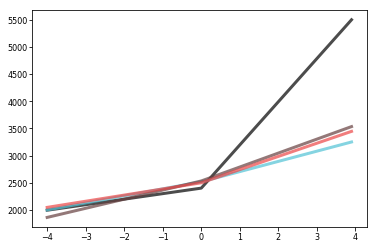

In [143]:
y_bin=[OB_FGmean,FG_all.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[new.dem_med,FG_all.dem_med,new.dem_med,new.dem_med]
bp = [2425,2450,2440] # break point (~ELA)
ELA = [2555,2540,2600];    s_ELA = [115,130,120]
def piecewise_linear(x, x0, y0, k1, k2):
    x0=0.
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   

for i in range(4):      
#     x0=ELA[I];
    X=np.array(y_bin[i]);  Y=np.array(x_bin[i])
    p , e = optimize.curve_fit(piecewise_linear, X, Y )
    xd = np.arange(-4,4,0.1)                       #np.arange(2150., 2900., 10.);
    yd = piecewise_linear(xd, *p)
    model = pwlf.PiecewiseLinFit(xd, yd)
    breaks = model.fit_guess([x0]); #breakpoints = [2150.,x0,2900.]
#     sl=model.slopes; se=model.standard_errors(); rsq=model.r_squared()
#     x_hat = np.linspace(2150, 2900, 10);  y_hat = model.predict(x_hat) 
    ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)
    if fit == 'PW':
        plt.plot(xd, piecewise_linear(xd, *p), color=color[i], lw=3., alpha=0.7)#0.9
#         plt.plot(x_hat, y_hat, lw=1., alpha=a, color=color[i], zorder=1)#label=label[i])

########## Linear fit ##################                


In [ ]:
new_main = new.copy();new_main.drop([4,5],inplace=True);new_main.reset_index(inplace=True)
    y_bin=[OB_FGmean[:-2],new_main.b_fg_we_gpr, new_main.b_fg_we,new_main.b_fg_weF]; x_bin=[new_main.dem_med,FG_all.dem_med,new_main.dem_med,new_main.dem_med]

In [ ]:
# compare cross-sectional area
GRi=new16.cr_area_gpr/new16.cr_area
GR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_area)
FRi=new16.cr_area_gpr/new16.cr_areaF
FR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_areaF)

print('cr_area % diff gpr to oggm', ((GR-1)*100).round(1))
print('cr_area % diff gpr to FAR19', ((FR-1)*100).round(1))

In [ ]:
r=[new16.RHO,new16.RHO_g,new16.RHO_F]
np.min(r)

In [ ]:
for i in range(4):
    y_bin=[OB_FGmean[:-2],new_main.b_fg_we_gpr, new_main.b_fg_we,new_main.b_fg_weF];
    x_bin=[new_main.dem_med,new_main.dem_med,new_main.dem_med,new_main.dem_med]

    print(len(y_bin[i])),print(len(x_bin[i]))

In [ ]:
ELA,m_ELA

In [ ]:
from numpy.linalg import lstsq

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck 

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

# Example:

import matplotlib.pyplot as plt
for i in range(1):
# X = np.linspace( 0, 10, 27 )
# Y = 0.2*X  - 0.3* ramp(X-2) + 0.3*ramp(X-6) + 0.05*np.random.randn(len(X))
    Y=np.array(y_bin[i]);  X=np.array(x_bin[i])
#     plt.plot(X, Y, 'ok' );

    initialBreakpoints = [2450]
    plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-', c=color[i] );
    plt.xlabel('X'); plt.ylabel('Y');
F= SegmentedLinearReg( X, Y, initialBreakpoints )

In [ ]:
F

In [ ]:
y_bin=[OB_FGmean,FG_all.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[new.dem_med,FG_all.dem_med,new.dem_med,new.dem_med]
bp = [2425,2450,2440] # break point (~ELA)
# def piecewise_linear(x, x0, y0, k1, k2):
#     x0=bp[I]
#     return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   

for i in range(4):      
    Y=np.array(y_bin[i]);  X=np.array(x_bin[i])

In [ ]:
pd.set_option('display.max_columns', None)
new16

In [ ]:
np.mean([18.07,19.01,18.87]),np.std([18.07,19.01,18.87])

In [ ]:
np.mean([26.2,21.8,32.5,36.5,-3.1,15.1]),np.std([26.2,21.8,32.5,36.5,-3.1,15.1])

In [ ]:
B=np.sqrt(new.spQout**2 + new.spQin**2)

print(B)
np.mean(B)                    

In [ ]:
k=[new16.sBwe_F,new16.sBwe_gpr,new16.sBwe_opt,new17.sBwe_F,new17.sBwe_gpr,new17.sBwe_opt,new.sBwe_F,new.sBwe_gpr,new.sBwe_opt]
np.nanmean(k)

In [ ]:
fig,ax=plt.subplots(1,1, figsize=cm2inch(24,12))
plt.plot(new.sQnetA_opt_high/new.sQnetA_opt-1, label='full slip (1.0)')
plt.plot(new.sQnetA_opt_low/new.sQnetA_opt-1, label='plug flow (0.80)')
plt.plot(new.sQnetA_opt/new.sQnetA_opt-1, label= 'best estimate (0.85)')
# plt.plot(new.sQnetA_opt_high/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt_low/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt/np.abs(new.Q_netA))
ax.set(ylabel='Percent Deviation',xlabel='Flux bin') #ylim=(0.2,0.6))
ax.legend()
plt.savefig(fl_path+'products/'+glacier[gl]+'Plug_flow_vs_full_slip effect.pdf')

In [ ]:
a=1-(new.sQnetA_opt_low/new.sQnetA_opt)
b=(new.sQnetA_opt_high/new.sQnetA_opt)-1
print(np.mean([a,b]),np.std([a,b]))
print(np.max(new.sQnetA_opt_high/new.sQnetA_opt-1),np.min(new.sQnetA_opt_low/new.sQnetA_opt)-1)

In [ ]:
(73+51+47)/(93+54+54)

In [ ]:
if I == 0:
    overlap=[]
    
for r in range(len(MC[r])):
    M_min = MC[i][r] - yerr_dh[i][r]; M_max = MC[i][r]+ yerr_dh[i][r]
    L_min = new.dh_mean[r] - sDHdt; L_max = new.dh_mean[r] + sDHdt
    if M_min > L_min and M_min < L_max:
        overlap.append(1)
    elif M_max < L_max and M_max > L_min:
        overlap.append(1)
    else:
        overlap.append(0)

In [ ]:
np.mean([0.224,0.374,0.4739,0.30,0.21,0.35]), np.std([0.224,0.374,0.4739,0.30,0.21,0.35])

In [ ]:
IND_V_mean = np.mean(VEL_LIST), np.std(VEL_LIST)
IND_V_mean

In [ ]:
VEL_LIST_indV=VEL_LIST
VEL_LIST_indV

In [ ]:
VEL_LIST

In [ ]:
ITS_LIVE_mean = np.mean(VEL_LIST), np.std(VEL_LIST)
ITS_LIVE_mean

In [ ]:
res = [i - j for i, j in zip(VEL_LIST_indV, VEL_LIST)] 
res2 =[i / j for i, j in zip(res, VEL_LIST_indV)]
np.mean(res2), np.std(res2)

In [ ]:
vi=[((VEL_LIST_indV[0]-VEL_LIST_indV[1])/VEL_LIST_indV[1]),
((VEL_LIST_indV[0]-VEL_LIST_indV[2])/VEL_LIST_indV[2]),
((VEL_LIST_indV[2]-VEL_LIST_indV[1])/VEL_LIST_indV[2]),]
np.mean(vi)

In [ ]:
# demV=new
pd.set_option('display.max_columns', None)
demV

In [ ]:
F= []
for i in range(len(new.Vfirn)):
    if i < 6:
        F.append(0.0)
    else:
        x=(new.dem_med[i]-1825)/(3235-1825)
        print(x)
        F.append((-1.84627291)*(x**2) + 3.49694183*x -0.56716304)
new['Vfirn_lin'] = F
new.Vfirn_lin

In [ ]:
FG_all.dem_mean

In [ ]:
FG_all.b_fg_we_gpr

In [ ]:
z_range_all

In [ ]:
VEL_LIST

In [ ]:
MC_df = pd.DataFrame(list(zip(new.BMC_gpr,new.BMC, new.BMCF)), columns=['BMC_gpr', 'BMC', 'BMCF']) 
new =  pd.concat([new, MC_df], axis=1)

In [ ]:
PBias

In [ ]:
pd.set_option('display.max_columns', None)
new

In [ ]:
####### Net flux uncertainty #################
np.sum(new.sQout)/np.sum(new.Q_out)
print(np.nanmean([new.sBwe_opt,new.sBwe_F]))

In [ ]:
(0.676+0.480+0.507)/3

In [ ]:
v=sVZ/new.v_gate_mean[1:]
v,new.v_gate_mean[1:]

In [ ]:
(.188*8+.23*15)/22


# Contour plots

In [ ]:
new.sQnetA_gpr

In [ ]:
np.mean(np.mean(new.sQnetA_gpr),np.mean(new.sQnetA_opt),np.mean(new.sQnetFA)#,new.sQnetA_opt

In [ ]:
print(np.mean(sVZ/new.v_gate_mean[1:]*100))
print(sHopt*new.HF[1:]/new.HF[1:]*100)

In [ ]:
################ Conrad gate 6 ####################

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
n=4
H=new.HF[n];W= new.gate_width[n];Q=new.Q_outF[n];V=new.v_gate_mean[n]
# plt.contourf([new.HF,np.sin(new.slope_mean)],new.spQoutF, 20, cmap='RdGy')
# plt.colorbar();
lvls=np.arange(0,90,0.1) ;lvls2=np.arange(0,71,10) 
x=np.arange(0,60,0.1)       #sVZ / new.v_gate_mean.values[1:]*100
y=np.arange(0,50,0.1)                          #sHopt*new.Hopt.values[1:]  ##*100 TO PUT IN PERCENT FOR PLOTTING PURPOSES
X, Y = np.meshgrid(x,y) 
#  np.sqrt((sVZ * (D.H_opt) * d)**2 + ((D.vfg*Dint) * d * (sHopt*D.H_opt))**2)
# Z= np.sqrt((X * (new.HF.values[1:]/100) * new.gate_width.values[1:])**2 + 
#     ((new.v_gate_mean.values[1:]) * new.gate_width.values[1:] * (Y*new.HF.values[1:]/100))**2)/new.Q_outF.values[1:]*100
Z= np.sqrt((X/100 * V * (H) * W)**2 +(V * W * (Y/100*H))**2)/Q*100
fig,ax=plt.subplots(1,1, figsize=cm2inch(8.5,7))
cp = ax.contourf(X, Y, Z,levels=lvls,alpha=1.0,cmap='viridis',zorder=0)
CS=ax.contour(X, Y, Z, levels=lvls2,colors='k',linewidths=0.8,zorder=1)#(dem, C_LABEL_SHOW=0, $ C_VALUE=levels, PLANAR=0, COLOR='black', $
ax.clabel(CS, inline=1,fmt='%1.0f')

cbar= fig.colorbar(cp, ticks=np.arange(0,90,20),label='$\sigma_{\Phi}$')#'Ice flux uncertainty (%)') # Add a colorbar to a plot
cbar.set_label('$\sigma_{\Phi}$ $(\%)$', fontsize=10)
#ax.set_xlabel('x (cm)')
ax.scatter(sVZ/new.v_gate_mean[1:]*100,sHopt*new.HF[1:]/new.HF[1:]*100,color='w',facecolors='none', zorder=2)
ax.scatter(sVZ/new.v_gate_mean[n]*100,sHopt*new.HF[n]/new.HF[n]*100,color='r',facecolors='none', zorder=3)
ax.set_ylabel('$\sigma_{H}$  $(\%)$',fontsize=10)#'Ice thickness uncertainty (%)')
ax.set_xlabel('$\sigma_{v}$  $(\%)$',fontsize=10)#'Ice velocity uncertainty (%)')
ax.set(xlim=(0,55),ylim=(0,50))
fig.subplots_adjust(bottom=0.135, top=0.98, hspace=0.1, left=0.13, right=0.96, wspace=0.03)
# plt.savefig(fl_path + 'products/contour_plot_gate_'+ str(n) +'.pdf', dpi=300)

In [ ]:
 ################ All three years ####################
# # x=[]; y=[];data=[new16[1:],new17[1:],new[1:]];vzm=[0.5,1.0,2.0];shm=[0.5,1.0,2.0]
# # for i in range(3):
# #     x.extend(sVZ*vzm[i] / data[i].v_gate_mean.values*100)
# #     y.extend(sHopt*shm[i]* data[i].Hopt.values)
# # cmb= pd.concat(data)

# # plt.contourf([new.HF,np.sin(new.slope_mean)],new.spQoutF, 20, cmap='RdGy')
# # plt.colorbar();
# lvls=np.arange(3,30,0.02) ;lvls2=np.arange(0,50,10) 
# # x=sVZ / new.v_gate_mean.values[1:]*100
# # y=sHopt*new.Hopt.values[1:]  ##*100 TO PUT IN PERCENT FOR PLOTTING PURPOSES
# X, Y = np.meshgrid(x,y) 
# #  np.sqrt((sVZ * (D.H_opt) * d)**2 + ((D.vfg*Dint) * d * (sHopt*D.H_opt))**2)
# # Z= np.sqrt((X * (new.HF.values[1:]/100) * new.gate_width.values[1:])**2 + 
# #     ((new.v_gate_mean.values[1:]) * new.gate_width.values[1:] * (Y*new.HF.values[1:]/100))**2)/new.Q_outF.values[1:]*100
# Z= np.sqrt((X * (cmb.HF.values/100) * cmb.gate_width.values)**2 + 
#     ((cmb.v_gate_mean.values) * cmb.gate_width.values * (Y*cmb.HF.values/100))**2)/cmb.Q_outF.values*100
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, Z,levels=lvls,alpha=0.8)
# # cp2 = ax.contourf(x, y, Z,levels=lvls2,alpha=0.0)
# # ax.contour(cp2, colors='k')
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Filled Contours Plot')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('Ice thickness uncertainty (%)')
# ax.set_xlabel('Ice velocity uncertainty (%)')
# ax.set(xlim=(10,45),ylim=(0,40))
# plt.show()
# # plt.contour(X,Y,Z, cmap='RdGy')
# # plt.colorbar()

In [ ]:
# ########## Just one year #########################

# # plt.contourf([new.HF,np.sin(new.slope_mean)],new.spQoutF, 20, cmap='RdGy')
# # plt.colorbar();
# lvls=np.arange(3,30,0.02) ;lvls2=np.arange(0,50,10) 
# x=sVZ / new.v_gate_mean.values[1:]*100
# y=sHopt*new.Hopt.values[1:]  ##*100 TO PUT IN PERCENT FOR PLOTTING PURPOSES
# X, Y = np.meshgrid(x,y) 
# #  np.sqrt((sVZ * (D.H_opt) * d)**2 + ((D.vfg*Dint) * d * (sHopt*D.H_opt))**2)
# Z= np.sqrt((X * (new.HF.values[1:]/100) * new.gate_width.values[1:])**2 + 
#     ((new.v_gate_mean.values[1:]) * new.gate_width.values[1:] * (Y*new.HF.values[1:]/100))**2)/new.Q_outF.values[1:]*100
# # Z= np.sqrt((X * (cmb.HF.values/100) * cmb.gate_width.values)**2 + 
# #     ((cmb.v_gate_mean.values) * cmb.gate_width.values * (Y*cmb.HF.values/100))**2)/cmb.Q_outF.values*100
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(x, y, Z,levels=lvls,alpha=0.8)
# # cp2 = ax.contourf(x, y, Z,levels=lvls2,alpha=0.0)
# # ax.contour(cp2, colors='k')
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Filled Contours Plot')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('Ice thickness uncertainty (%)')
# ax.set_xlabel('Ice velocity uncertainty (%)')
# ax.set(xlim=(10,45),ylim=(0,40))
# plt.show()
# # plt.contour(X,Y,Z, cmap='RdGy')
# # plt.colorbar()

In [ ]:
residuals= [z_range_all,gpr_bdiff,farin_bdiff,opt_bdiff,obs_bin_all]

r = pd.DataFrame(list(zip(z_range_all,elev_all,gpr_bdiff,farin_bdiff,opt_bdiff,gpr_bd_fg,opt_bd_fg,farin_bd_fg,obs_bin_all,obs_fg_all)), 
                  columns=['z_range_all','elev_all','gpr_bdiff','farin_bdiff','opt_bdiff','gpr_bd_fg','opt_bd_fg','farin_bd_fg',
                           'obs_bin_all','obs_fg_all']) 
# r['zrel'] = r.elev_all-np.nanmin(dem.data[msk_conrad.data==1.0]) ## use minimum elevation
# r.zrel= r.zrel / np.nanmax(dem.data[msk_conrad.data==1.0])  ## ## use minimum elevation
r['zrel'] = r.elev_all-r.z_range_all.min()
r.zrel= r.zrel / r.zrel.max()

r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all); 
## for FG bins
r['opt_bd_fr']=r.opt_bd_fg/np.abs(r.obs_fg_all)
r['farin_bd_fr']=r.farin_bd_fg/np.abs(r.obs_fg_all);r['gpr_bd_fr']=r.gpr_bd_fg/np.abs(r.obs_fg_all);

In [ ]:
pd.set_option('display.max_columns', None)
r

In [ ]:
fig_path= '/home/pelto/Desktop/ice_flux/figures/'

with open(fig_path + glacier[gl]+'_residuals.pkl', 'wb') as f: #_NOfirn
    pickle.dump(r, f)

In [ ]:
r.gpr_bd_fg.mean(),r.gpr_bdiff.mean()

In [ ]:
r.opt_bd_fg.mean(),r.opt_bdiff.mean()

In [ ]:
y1=np.array([2016]*13);y2=np.array([2017]*13);y3=np.array([2018]*13);Years=np.concatenate([y1,y2,y3])
r['year']=Years
r.z_range_all[r.z_range_all==2750.0]=np.nan;#
for n in range(len(r)):
    if (r.z_range_all[n]==2550.0) and (r.year[n]<2018):
        r.z_range_all[n]=np.nan
    if (r.z_range_all[n]>2750.0) and (r.year[n]==2017):
        r.z_range_all[n]=np.nan
    if (r.z_range_all[n]>2450.0 or r.z_range_all[n]==2550.0) and (r.year[n]==2017):
        r.z_range_all[n]=np.nan

# r.z_range_all[ & r.year<2018]=np.nan
r.dropna(subset=['z_range_all'],inplace=True)

r

In [ ]:
import seaborn as sns
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
s=40; a=1; lw=1.0;
fig, ax = plt.subplots(1,2, figsize=(cm2inch(36, 18))) ##mass conservation plot

# sns.kdeplot(DF.zrel, DF.all_frac, cmap='Blues', shade=True, cbar=False, shade_lowest=True,ax=ax[0],alpha=a,zorder=0)
# sns.kdeplot(DF.zrel, DF.all_data, cmap='Blues', shade=True, shade_lowest=True,ax=ax[1],alpha=a,zorder=0)

c=['k', '#f1a340','#998ec3']

for i in range(1):
    with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f:
        r = pickle.load(f)
      
   # r.gpr_fr[np.abs(r.gpr_fr)>5]=np.nan; r.far_fr[np.abs(r.far_fr)>5]=np.nan; r.opt_fr[np.abs(r.opt_fr)>5]=np.nan 
    
    ax[0].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
    ax[0].set(ylabel=('MB residual (fractional)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1),ylim=(-4,4))
    ax[0].scatter(r.zrel, r.gpr_fr ,color=c[i],marker='^',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[0].scatter(r.zrel, r.far_fr, color=c[i],marker='d',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[0].scatter(r.zrel, r.opt_fr, color=c[i],marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    
    ax[0].scatter(r.zrel, r.gpr_bd_fg ,color='r',marker='^',s=s, facecolors='none', lw=lw, zorder=3,alpha=a)
    ax[0].scatter(r.zrel, r.opt_bd_fg ,color='r',marker='^',s=s, facecolors='none', lw=lw, zorder=3,alpha=a)
    ax[0].scatter(r.zrel, r.farin_bd_fg ,color='r',marker='^',s=s, facecolors='none', lw=lw, zorder=3,alpha=a)
    
    ax[1].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
    ax[1].set(ylabel=('MB residual (m w.e.)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1),ylim=(-2,2.7))
    ax[1].scatter(r.zrel, r.gpr_bdiff,color=c[i],marker='^',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[1].scatter(r.zrel, r.farin_bdiff, color=c[i],marker='d',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[1].scatter(r.zrel, r.opt_bdiff,color=c[i],marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    
    ax[1].scatter(r.zrel, r.farin_bd_fg, color='r',marker='d',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[1].scatter(r.zrel, r.opt_bd_fg,color='r',marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    ax[1].scatter(r.zrel, r.gpr_bd_fg,color='r',marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    
# ax[1].legend()
plt.tight_layout()


In [ ]:
with open(fig_path + glacier[gl] +'_residuals.pkl', 'rb') as f:
    tester = pickle.load(f)
tester

In [ ]:
pd.set_option('display.max_columns', None)
new.spQout

In [ ]:
SE_L=np.array(SE_L);SL_L=np.array(SL_L);

In [ ]:
new.to_csv(fl_path+ glacier[gl]+ '_new.csv')

In [ ]:
    x = [x_ax_obs, new.b_fg_we_gpr, new.b_fg_we, new.b_fg_weF]
    y = [y_ax_obs, new.dem_mean, new.dem_mean, new.dem_mean]

### Illecillewaet
- mean percent smb error: 2.49
- mean flux error: 37.4
- mean SMB error: 0.51

### Kokanee
- mean percent smb error: 1.64
- mean flux error: 230.9  ## was 67.8...what changed, slower vel?
- mean SMB error: 0.46

### Conrad
- mean percent smb error: 1.68
- mean flux error: 23.7
- mean SMB error: 0.58

In [ ]:
AV=[]
for i in range(len(new)):
    AV.append(np.nanmean([new.b_fg_h[i]-new.Vfirn[i], new16.b_fg_h_gpr[i]-new16.Vfirn[i], new17.b_fg_hF[i]-new17.Vfirn[i]]))
AV

In [ ]:
print('mean smb error:', round(np.mean([0.58,0.46,0.51]),2),'m w.e.')
print('mean flux error:', round(np.mean([34.8,67.1,38.5]),1), '%')

In [ ]:
round(np.nanmean([np.abs(new16.sBwe_F/new16.b_fg_weF),np.abs(new16.sBwe_gpr/new16.b_fg_we_gpr),
                                             np.abs(new16.sBwe_opt/new16.b_fg_we)]))

In [ ]:
print('mean percent smb error:', round(np.nanmean([np.abs(new16.sBwe_F/new16.b_fg_weF),np.abs(new16.sBwe_gpr/new16.b_fg_we_gpr),
                                             np.abs(new16.sBwe_opt/new16.b_fg_we),np.abs(new17.sBwe_F/new17.b_fg_weF),np.abs(new17.sBwe_gpr/new17.b_fg_we_gpr),
                                             np.abs(new17.sBwe_opt/new17.b_fg_we),np.abs(new.sBwe_F/new.b_fg_weF),np.abs(new.sBwe_gpr/new.b_fg_we_gpr),
                                             np.abs(new.sBwe_opt/new.b_fg_we)]),2))

print('mean flux error:',round(np.nanmean([new16.spQo_gpr,new16.spQout,new16.spQoutF]),1))

mean_error= np.mean([new16.sBwe_opt.mean(),new16.sBwe_F.mean(),new16.sBwe_gpr.mean(),new17.sBwe_opt.mean(),
            new17.sBwe_F.mean(),new17.sBwe_gpr.mean(),new.sBwe_opt.mean(),new.sBwe_F.mean(),new.sBwe_gpr.mean()])
print('mean SMB error:', round(mean_error,2))

## Calculate glacier-wide SMB and compare with field obs 

In [ ]:

SMB = [new16.b_fg_we_gpr,new17.b_fg_we_gpr,new.b_fg_we_gpr, new16.b_fg_we,new17.b_fg_we,new.b_fg_we,
      new16.b_fg_weF,new17.b_fg_weF,new.b_fg_weF]
Bn=[]
for i in range(len(SMB)):
    MB=SMB[i]*new.dem_count
    A=np.sum(MB)/np.sum(new.dem_count)
    Bn.append(round(A,2))
field=[-0.2,-0.95,-0.6,-0.2,-0.95,-0.6,-0.2,-0.95,-0.6]

MB_df = pd.DataFrame(list(zip(field, Bn)), 
            columns=['field', 'flux_bn'])

MB_df['MBAL_diff']=MB_df.field-MB_df.flux_bn

print(MB_df.MBAL_diff.mean())
MB_df

In [ ]:
MB_df.MBAL_diff.mean()

In [ ]:
MBAL

In [ ]:
new16.cr_area_gpr,new16.cr_area


In [ ]:
tongue=(new16.cr_area_gpr[1:7].sum()/new16.cr_area[1:7].sum())
tongue-1


In [ ]:
##### calculate difference in cross-sectional area #######
R= np.sum(new.cr_areaF)/np.sum(new.cr_area)
Ri=new.cr_areaF/new.cr_area

Ri=Ri-1

Ri[Ri<-.6]=np.nan
print(R)
print(np.nanmean(Ri))
GRi=new.cr_areaF/new.cr_area
GRi=GRi-1
GRi[GRi<-.8]=np.nan
GR= np.sum(new.cr_areaF)/(np.sum(new.cr_area)-new.cr_area[7]) ##total
# GR=GR-1
# GR[9]=np.nan;GR[14]=np.nan;
# print(GR)
# GR.mean()
np.nanmean(GRi),np.nanstd(GRi)

In [ ]:
a=[];b=[];c=[]
for i in range(len(new16.cr_area)-1):
    a.append(new16.cr_area_gpr[i]/new16.cr_area_gpr[i+1])
    b.append(new16.cr_area[i]/new16.cr_area[i+1])
    c.append(new16.cr_areaF[i]/new16.cr_areaF[i+1])
dcr=pd.DataFrame(list(zip(a,b,c)),columns=['a','b','c'])
dcr['ab']=1-dcr.a/dcr.b;dcr['bc']=1-dcr.b/dcr.c;dcr['ac']=1-dcr.a/dcr.c
dcr.ab.median(),dcr.bc.median(),dcr.ac.median()

## Stake Velocities

In [ ]:
stakes=pd.read_csv(fl_path + 'stake_vel_VV_ALL.csv')
k_stakes=pd.read_csv('/home/pelto/Desktop/ice_flux/Kokanee/stakes_vel.csv')

In [ ]:
stakes[stakes.Name=='CST2D']

In [ ]:
fig3, ax3 = plt.subplots(1,1, sharex=True, sharey=True, figsize=(cm2inch(6, 6)))


Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']

ax3.scatter(stakes.Elev_Old+25.,stakes.velocity,color='#1c9099',label='Stakes', alpha=0.6, 
            s=6,facecolor='', zorder=3)
# AX=ax3.twinx()
# for i in range(3):
#     ax3.scatter(new.dem_mean, Yvv[i], edgecolor='k', marker=sym[i+1], alpha=0.6, label=Yvv_lbl[i], s=35, 
#                        color=color[i+1], zorder=2, linewidth=0.25)
meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
boxprops = dict(linewidth=0.25);
BOXVEL=ax3.boxplot(vfg_all,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops,whiskerprops=boxprops, showmeans=True,
                  meanline=True, sym='', positions=gate_elev,widths=30, zorder=1)

# ax3.set_xticks([2000, 2200, 2400, 2600, 2800, ])  #, 2650])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(200))
# ax3.set_xticklabels([2100, 2200,  2300, 2400, 2500, 2600]) 
ax3.set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, ''])
ax3.set(xlim=(1850, 3150))

# ax3.legend(loc='upper right', labelspacing=0.35)
fig3.text(0.005, 0.7, 'Ice velocity (m $a^{-1}$)',rotation=90)
# fig3.text(0.005, 0.65, r'$V^{\uparrow}$' + '(m ice $a^{-1}$)',rotation=90) #transform=ax3.transAxes)
# fig3.text(0.94, 0.7, 'Ice velocity (m $a^{-1}$)',rotation=90)

fig3.subplots_adjust(bottom=0.11, top=0.98, hspace=0.1, left=0.15, right=0.98, wspace=0.05)
fig3.savefig(fl_path + 'products/' + glacier[gl] + '_Velocities_only.pdf', dpi=300)

In [ ]:
stakes

In [ ]:
stakes['VV_tan']=(stakes.Elev_New-stakes.Elev_Old)/(stakes.time_days/365.) - stakes.velocity.values*np.tan(np.deg2rad(stakes.slope.values))
stakes['VV_D_A']=np.abs(stakes.B_dh) - np.abs(stakes.Elev_New-stakes.Elev_Old)
# stakes.VV_tan[stakes.time_days<200]=np.nan

In [ ]:
stakes

In [ ]:
# stakes['VV_d_stake']=stakes.Alt_D-stakes.B_dh

In [ ]:
fig3, ax3 = plt.subplots(1,1, sharex=True, sharey=True, figsize=(cm2inch(6, 6))) ##mass conservation plot
color = ['k', 'teal', '#74c476', '#238b45']
Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']

# ax3.scatter(stakes.Elevation+25.,stakes.VV,color='k',label='Stakes', alpha=0.9, 
#             s=6,facecolor='', zorder=3)

# ax3.scatter(stakes.Elevation+25.,stakes.VV*0.9,color='r',label='Stakes', alpha=0.9, 
#             s=6,facecolor='', zorder=3)
# ax3.scatter(stakes.Elev_Old+25.,stakes.VV_d_stake*0.9,color='r',label='Stakes', alpha=0.9, 
#             s=6,facecolor='', zorder=3)
ax3.scatter(stakes.Elev_Old+25.,stakes.VV_tan*0.9,color='k',label='Stakes', alpha=0.9, 
            s=6,facecolor='', zorder=3)
ax3.scatter(stakes.Elev_Old+25.,stakes.VV_d*0.9,color='#1c9099',label='Stakes VV_d DEM', alpha=0.9, 
            s=6,facecolor='', zorder=3)
ax3.scatter(stakes.Elev_Old+25.,stakes.VV_D_A*0.9,color='r',label='Stakes VV_D_A', alpha=0.9, 
            s=6,facecolor='', zorder=3)

for i in range(3):
    ax3.scatter(new.dem_mean, Yvv[i], edgecolor='k', marker=sym[i+1], alpha=0.6, label=Yvv_lbl[i], s=35, 
                       color=color[i+1], zorder=2, linewidth=0.25)
# meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
# boxprops = dict(linewidth=0.25);
# BOXVEL=ax3.boxplot(vfg_all,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops,whiskerprops=boxprops, showmeans=True,
#                   meanline=True, sym='', positions=gate_elev,widths=30, zorder=1)

# ax3.set_xticks([2000, 2200, 2400, 2600, 2800, ])  #, 2650])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(200))
# ax3.set_xticklabels([2100, 2200,  2300, 2400, 2500, 2600]) 
ax3.set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, ''])
ax3.set(xlim=(1850, 3175));ax3.set(ylim=(-5, 7))

# ax3.legend(loc='upper right', labelspacing=0.35)
# fig3.text(0.005, 0.7, 'Ice velocity (m $a^{-1}$)',rotation=90)
fig3.text(0.005, 0.65, r'$V^{\uparrow}$' + '(m ice $a^{-1}$)',rotation=90) #transform=ax3.transAxes)
# fig3.text(0.94, 0.7, 'Ice velocity (m $a^{-1}$)',rotation=90)

fig3.subplots_adjust(bottom=0.11, top=0.98, hspace=0.1, left=0.2, right=0.98, wspace=0.05)
fig3.savefig(fl_path + 'products/' + glacier[gl] + '_Emergence_Velocities_D_A.png', dpi=300)

In [ ]:
pd.set_option('display.max_columns', None)
stakes

In [ ]:
glacier

## 3-Panel plot surface velocity

In [ ]:
######## save Conrad data as pickle ##############

# glacier= ['Conrad', 'Kokanee', 'Illecillewaet']
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
import pickle
with open(fig_path + 'conrad_vfg_all.pkl', 'wb') as f:
    pickle.dump(vfg_all, f)
with open(fig_path + 'conrad_gate_elev.pkl', 'wb') as f:
    pickle.dump(gate_elev, f)
new.to_csv(fig_path + 'conrad_new_2018.csv')

# with open(fig_path + glacier[1] +'_vfg_all.pkl', 'rb') as f:
#     vfg_all = pickle.load(f)
# with open(fig_path + glacier[1] + '_gate_elev.pkl', 'rb') as f:
#     gates_elev = pickle.load(f)

In [ ]:
# g=1
# VV=pd.read_csv(fig_path+ glacier[g]+ '_new_2018.csv')
# with open(fig_path + glacier[g] +'_vfg_all.pkl', 'rb') as f:
#     VFG = pickle.load(f)
# with open(fig_path +glacier[g] +'_gate_elev.pkl', 'rb') as f:
#     gates_elev = pickle.load(f)

In [ ]:
###### binned stake observations for each flux bin ##############

with open(fig_path + 'conrad_gate_elev.pkl', 'rb') as f:
    gates_elev = pickle.load(f)

stk_fg=[];
for i in range(len(new.dem_med)): 
    f = new.dem_med[i]
    W=0;bin_size = new.dem_std[i]*2.; COU=1
    while W==0:
        stkfg = [];
        for n in range(len(stakes)):
            if ((f - bin_size) <= stakes.Elev_Old[n]) and (stakes.Elev_Old[n] <=  (f + bin_size)):
                O = stakes.velocity[n]
                stkfg.append(O);

#         if len(OBSFG)<2 and bin_size<150:
#             bin_size=bin_size*(1+(.2*COU))
#             COU=COU+1
        else:
            stk_fg.append(np.array(stkfg));
            W=1

In [ ]:
###### binned stake observations for each flux bin ##############

k=pd.read_csv(fig_path+ 'kokanee_new_2018.csv')
k

Kstk_fg=[];
for i in range(len(k.dem_med)): 
    f = k.dem_med[i]
    W=0;bin_size = k.dem_std[i]*2.; COU=1
    while W==0:
        Kstkfg = [];
        for n in range(len(k_stakes)):
            if ((f - bin_size) <= k_stakes.Elev[n]) and (k_stakes.Elev[n] <=  (f + bin_size)):
                O = k_stakes.Velocity[n]
                Kstkfg.append(O);

#         if len(OBSFG)<2 and bin_size<150:
#             bin_size=bin_size*(1+(.2*COU))
#             COU=COU+1
        else:
            Kstk_fg.append(np.array(Kstkfg));
            W=1

In [ ]:
W=np.squeeze(V)
W

In [ ]:
import seaborn as sns
########### plot for all three glaciers
year =[2016,2017,2018]
fig3, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(cm2inch(8.5, 18))) 
a=ax1,ax2,ax3
widths=25,25,20
for g in range(3):
    fpath=fl_path[:-7]+Glacier[g]+'/'#[g]
    
                
#     for i in range(3):
       # P=[2,4,6,8,10,12,14,16,18]
#         YR = year[i]
        #D=data[data.year==YR]

    
    
    
    
    colors = ['#bdc9e1', '#74a9cf', '#0570b0', '#cb181d', '#88419d', '#8c6bb1'] #, '#8c96c6']
    colors = ['#003f5c','#bc5090','#ffa600']

    Bob = sns.boxplot(x=data.year, y=data.V, hue=data.source, palette=colors, 
                saturation=0.7, linewidth=0.80, fliersize=1, ax=a[g]) 
    
    a[g].text(0.03, 0.92, letter[g], transform=a[g].transAxes)
    if g==1:
        a[g].text(0.75, 0.92, Glacier[g], transform=a[g].transAxes)
    else:
        a[g].text(0.8, 0.92, Glacier[g], transform=a[g].transAxes) 
        
        #hue_order= ['vz', 'vfg'], order=["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig","Conrad", "Kokanee"]
        
        
#         meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
#         boxprops = dict(linewidth=0.25);
#         BOXVEL=a[g].boxplot(data[data.year==YR].V.values,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops, 
#                 whiskerprops=boxprops, showmeans=True, meanline=True, positions=data.year[data.year==YR].values 
#                 ,labels=data[data.year==YR].source.values, sym='',widths=widths[g],capprops=boxprops,zorder=1) #, positions=float(YR)
#         
#     if g==0:
#         GE=[]
#         for i in range(len(gates_elev)):
#             G=gates_elev[i]-30;  GE.append(G)
#         bx=dict(linewidth=0.25);flp=dict(color='#1c9099',s=10,facecolor='')
#         BOXstakes=ax1.boxplot(stk_fg[:-7],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
#             whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-6],widths=widths[g], 
#             capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
       
#         clrs='lightblue'
#         for patch, color in zip(BOXstakes['boxes'], clrs):
#             patch.set_facecolor(clrs)
            
#     if g==2:
#         GE=[]
#         for i in range(len(gates_elev)):
#             G=gates_elev[i]-25;  GE.append(G)
#         kBOXstakes=ax3.boxplot(Kstk_fg[:-2],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
#             whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-1],widths=widths[g], 
#             capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
#         clrs='lightblue'
#         for patch, color in zip(kBOXstakes['boxes'], clrs):
#             patch.set_facecolor(clrs)
        
#     ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
#     ax1.set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, '']); ax1.set(xlim=(1875, 3125))
#     ax1.text(0.58, 0.9, 'C10', fontsize=8,transform=ax1.transAxes);ax1.set(ylim=(-2, 51))
#     ax2.set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
#     ax2.set_xticklabels(["", 2200,  "", 2400, "", 2600]) 
#     ax2.set(xlim=(2090, 2675));#ax2.set_yticklabels([""])
#     ax3.set_xticklabels([2300, '', 2500, '', 2700, '']) 
#     ax3.set_xticks([2300, 2400, 2500, 2600, 2700, 2800]);ax3.set_yticks([0, 5, 10, 15]) 
#     ax3.set(xlim=(2290, 2730));#ax3[2,0].set_yticklabels([""])

#     ax3.set_zorder(1)
#     ax3.patch.set_visible(False)
    


# ax3[2,0].legend(loc='upper right', labelspacing=0.35, bbox_to_anchor=(0.99, 0.94))

# ax2.set_ylabel('Ice velocity (m a$^{-1}$)')    #0.005, 0.68, ,rotation=90)
fig3.subplots_adjust(bottom=0.065, top=0.98, hspace=0.12, left=0.12, right=0.99, wspace=0.09)
# fig3.savefig(fig_path + 'All_Velocities_boxplt.pdf', dpi=300)



In [ ]:
fl_path[:-7]

# Surface velocity vs stakes boxplot

In [ ]:
np.shape(K)

In [ ]:
##only surface velocity
import warnings
warnings.filterwarnings("ignore")
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 9};plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.';pylab.rcParams['ytick.major.pad']='1.';pylab.rcParams['ytick.major.size']='3'
Glacier = ['  Conrad', 'Illecillewaet', 'Kokanee'];glacier = ['conrad', 'illecillewaet', 'kokanee']
########### plot for all three glaciers

fig3, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(cm2inch(9, 15))) ##mass conservation plot
a=ax1,ax2,ax3
widths=25,25,20
for g in range(3):
    VV=pd.read_csv(fig_path+ glacier[g]+ '_new_2018.csv')
    with open(fig_path + glacier[g] +'_vfg_all.pkl', 'rb') as f:
        VFG = pickle.load(f)
    with open(fig_path +glacier[g] +'_gate_elev.pkl', 'rb') as f:
        gates_elev = pickle.load(f)
            
    for i in range(3):
        meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
        boxprops = dict(linewidth=0.25);
        BOXVEL=a[g].boxplot(VFG,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops, 
                whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=gates_elev,widths=widths[g], 
                capprops=boxprops,zorder=1)
    if g==0:
        GE=[]
        for i in range(len(gates_elev)):
            G=gates_elev[i]-30;  GE.append(G)
        bx=dict(linewidth=0.25);flp=dict(color='#1c9099',s=10,facecolor='')
        BOXstakes=ax1.boxplot(stk_fg[:-7],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
            whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-6],widths=widths[g], 
            capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
       
        clrs='lightblue'
        for patch, color in zip(BOXstakes['boxes'], clrs):
            patch.set_facecolor(clrs)
            
    if g==2:
        GE=[]
        for i in range(len(gates_elev)):
            G=gates_elev[i]-25;  GE.append(G)
        kBOXstakes=ax3.boxplot(Kstk_fg[:-2],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
            whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-1],widths=widths[g], 
            capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
        clrs='lightblue'
        for patch, color in zip(kBOXstakes['boxes'], clrs):
            patch.set_facecolor(clrs)
        
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax1.set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, '']); ax1.set(xlim=(1875, 3125))
    ax1.text(0.58, 0.9, 'C10', fontsize=8,transform=ax1.transAxes);ax1.set(ylim=(-2, 51))
    ax2.set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
    ax2.set_xticklabels(["", 2200,  "", 2400, "", 2600]) 
    ax2.set(xlim=(2090, 2675));#ax2.set_yticklabels([""])
    ax3.set_xticklabels([2300, '', 2500, '', 2700, '']) 
    ax3.set_xticks([2300, 2400, 2500, 2600, 2700, 2800]);ax3.set_yticks([0, 5, 10, 15]) 
    ax3.set(xlim=(2290, 2730));#ax3[2,0].set_yticklabels([""])

    ax3.set_zorder(1)
    ax3.patch.set_visible(False)
    
    a[g].text(0.03, 0.92, letter[g], transform=a[g].transAxes)
    if g==1:
        a[g].text(0.75, 0.92, Glacier[g], transform=a[g].transAxes)
    else:
        a[g].text(0.8, 0.92, Glacier[g], transform=a[g].transAxes)    

ax1.scatter(stakes.Elev_Old[stakes.velocity>40],stakes.velocity[stakes.velocity>40],color='#1c9099',label='Stakes', alpha=0.9, 
            s=10,facecolor='', zorder=3)
ax3.scatter(k_stakes.Elev,k_stakes.Velocity,color='#1c9099',label='Stakes', alpha=0.95, 
            s=10,facecolor='', zorder=3)
# ax3[2,0].legend(loc='upper right', labelspacing=0.35, bbox_to_anchor=(0.99, 0.94))

ax2.set_ylabel('Ice velocity (m a$^{-1}$)')    #0.005, 0.68, ,rotation=90)
ax3.set_xlabel('Elevation (m a.s.l.)')
fig3.subplots_adjust(bottom=0.065, top=0.98, hspace=0.12, left=0.12, right=0.99, wspace=0.09)
fig3.savefig(fig_path + 'All_Velocities_boxplt.pdf', dpi=300)



In [ ]:
# stakes.VV = (stakes.B_dh*-1.)+(stakes.velocity.values*np.tan(np.deg2rad(-stakes.slope.values)))

In [ ]:
stakes.velocity.max()

In [ ]:
stakes=pd.read_csv(fl_path + 'stake_vel_VV_ALL.csv')
k_stakes=pd.read_csv('/home/pelto/Desktop/ice_flux/Kokanee/stakes_vel.csv')

In [ ]:
stakes['VV_diff']=stakes.DH_all-stakes.B_dh
I_stakes= pd.read_csv('/home/pelto/Desktop/ice_flux/Illecillewaet/Illecillewaet_bdot.csv')

In [ ]:
I_stakes['VV_d']=I_stakes.dh_r-I_stakes.Ba_h+I_stakes.Vfirn
I_stakes=I_stakes[I_stakes.Year>2015]
# BIN = [np.nan,5,4,4,2,1,0,0,0,0,np.nan,5,4,4,2,1,0,0,0,5,np.nan,np.nan,4,2,1,0,0,0,0] # illec
# I_stakes['BIN'] = BIN
# k_stakes['BIN']= [1,0,2,1,1,0,np.nan,np.nan,np.nan,np.nan,np.nan,]
# stakes['BIN']=[2,0,0,1,2,0,0,2,0,0,1,1,1,1,3,3,3,3,3,2,5,4,5,0,0,1,1,2,3,3,3,3,3,3,4,6,5,5,5,5,4,6,5,5,5,3,3,3,3,3,1,1,1,
#        1,3,4,5,5,5,5,4,5,5]

In [ ]:
# for i in range(6):
#     print(np.nanmean(I_stakes.VV_d[I_stakes.BIN==i]),'bin',i)
# for i in range(5):
#     print(np.nanmean(k_stakes.VV[k_stakes.BIN==i]),'bin',i)
# for i in range(11):
#     print(np.nanmean(stakes.VV_diff[stakes.BIN==i]),'bin',i)

In [ ]:
# pd.set_option('display.max_columns', None)
# stakes

In [ ]:

stakes['slope_rad']=np.deg2rad(stakes.slope)
# stakes['VV_tan'] = -stakes.B_dh.values - (stakes.velocity.values*np.tan(stakes.slope_rad))
v=[]
for i in range(len(stakes)):
    if np.abs(stakes.slope[i]>2.0):
        u= stakes.B_dh[i] + (stakes.velocity[i]*np.tan(stakes.slope_rad[i]))
    else:
        u= stakes.B_dh[i] + (stakes.velocity[i]*stakes.slope_rad[i])
    v.append(u*-1)
stakes['VV_tan'] = pd.Series(v)

In [ ]:
stakes['ALT_D']=(stakes.velocity.values*np.tan(np.deg2rad(-1*stakes.slope.values)))

In [ ]:
# P=stakes.velaocity.values*np.tan(np.deg2rad(stakes.slope.values))
# P

## 3-Panel plot emergence velocity

In [ ]:
# np.mean([new.Q_netAF[0], new.Q_netA_gpr[0], new.Q_netA[0]])
# np.mean([new.dh_mean[0], new16.dh_mean[0], new17.dh_mean[0]])

In [ ]:
# print(np.nanmean(stakes[stakes['Name']=='CST0'].B_dh))
# print(np.nanmean(I_stakes[I_stakes[' ID']=='20'].Ba_h))
# print(np.nanmean(I_stakes[I_stakes[' ID']=='20'].VV_d))
# print(np.nanmean(I_stakes[I_stakes[' ID']=='20'].dh_r))
# print(np.nanmean(k_stakes[k_stakes['ID']=='KST55'].B_dh))
# print(np.nanmean(k_stakes[k_stakes['ID']=='KST55'].dh_r))
# print(np.nanmean(k_stakes[k_stakes['ID']=='KST55'].VV))
# # I_stakes[I_stakes[' ID']=='20'].Ba_h
# np.mean([0.782,0.975])
# stakes[stakes.Name=='CST0'].B_dh

In [ ]:
I_stakes_mean = [2.97,1.89,0.76,np.nan,-0.83,-1.57];I_stakes_mean_elev =[2206.26, 2325.64, 2395.14, 2479.68, 2547.14, 2585.20]
k_stakes_mean=[1.37,1.01,0.56];k_stakes_mean_elev=[2289.58, 2422.68,2519.7]
C_stakes_mean=[0.98,2.20,2.13,1.49,1.48,1.01,-1.11];C_stakes_mean_elev=[1998.67, 2079.7 , 2127.6 , 2215.65, 2334.59, 2426.14, 2554.7]

In [ ]:
# pd.set_option('display.max_rows', None)
# stakes

In [ ]:
##only emergence velocity
import pickle
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 9}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'
pylab.rcParams['ytick.major.size']='3'
Glacier = ['Conrad', 'Illecillewaet', 'Kokanee']
glacier = ['conrad', 'illecillewaet', 'kokanee']
########### plot for all three glaciers

fig3, ax3 = plt.subplots(1,3, sharey=True, figsize=(cm2inch(18, 8))) ##mass conservation plot
color = ['k', '#51c2d5','#663f3f','#ec4646']

for g in range(3):
#     VV=pd.read_csv(fig_path+ glacier[g]+ '_new_2018.csv')
    fpath=fl_path[:-7]+Glacier[g]+'/'
    with open(fpath + glacier[g] +'_new18.pkl', 'rb') as f:
        VV = pickle.load(f)
#     with open(fig_path + glacier[g] +'_vfg_all.pkl', 'rb') as f:
#         vfg_all = pickle.load(f)
#     with open(fig_path +glacier[g] +'_gate_elev.pkl', 'rb') as f:
#         gates_elev = pickle.load(f)
    

    for i in range(3):
        
        Yvv = [VV.Q_netA_gpr, VV.Q_netA, VV.Q_netAF]
        Yvv_lbl=[r'$V_{z,IPR}$',r'$V_{z,OGGM}$',r'$V_{z,Farin}$']
        print(np.mean([VV.Q_netA_gpr[0], VV.Q_netA[0], VV.Q_netAF[0]]))

        ax3[g].scatter(VV.dem_mean, Yvv[i], edgecolor=color[i+1], marker=sym[i+1], alpha=0.9, label=Yvv_lbl[i],
                       s=40, color=color[i+1], zorder=1+i, linewidth=0.25,facecolor='',lw=mew+.1)
#     ax3[0].set_ylim(-12,8)     
    if g == 0:
        ax3[0].xaxis.set_major_locator(ticker.MultipleLocator(200));
        ax3[0].set_xticklabels(['',2000, '', 2400, '', 2800, '']); ax3[0].set(xlim=(1850, 3100))#, ylim=(-3.2,3.2))
    elif g==1:
        ax3[1].set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
        ax3[1].set_xticklabels(["", 2200,  "", 2400, "", 2600]) 
        ax3[1].set(xlim=(2150, 2650))#AX.set_yticklabels([""])
    else:
        ax3[2].set_xticklabels([2300, '', 2500, '', 2700, '']) 
        ax3[2].set_xticks([2300, 2400, 2500, 2600, 2700, 2800]) 
        ax3[2].set(xlim=(2250, 2750))
    
    ax3[g].set_zorder(1)
    ax3[g].patch.set_visible(False)
    
    ax3[g].text(0.92, 0.03, letter[g], transform=ax3[g].transAxes)
    if g==0:
        ax3[g].text(0.75, 0.95, Glacier[g], transform=ax3[g].transAxes)
    elif g==1:
        ax3[g].text(0.6, 0.95, Glacier[g], transform=ax3[g].transAxes)
    else:
        ax3[g].text(0.7, 0.95, Glacier[g], transform=ax3[g].transAxes)

    ax3[g].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=0)
    
    # ELA 2013--2018
    ELA=[2591.,2549.,2605.]; ELA_std=[58,51,61]
    ax3[g].errorbar(ELA[g],0.,xerr=ELA_std[g],color='k', alpha=.9, fmt='o',ms=4, zorder=7,lw=mew+.1,label='ELA')
       
###individual stakes
# ax3[0].scatter(stakes.Elev_Old,stakes.VV_tan,color='r',label='StakesTAN', alpha=0.9, 
#             s=8,facecolor='', zorder=6)
# ax3[1].scatter(I_stakes.Elev,I_stakes.VV_d,color='k',label='', alpha=0.4, 
#             s=8,facecolor='', zorder=6)
# ax3[2].scatter(k_stakes.Elev,k_stakes.VV,color='k',label='', alpha=0.4, 
#             s=8,facecolor='', zorder=6)
# ax3[0].scatter(stakes.Elev_Old+25.,stakes.VV,color='r',label='Stakes', alpha=0.9, 
#             s=8,facecolor='', zorder=6)
# ax3[0].scatter(stakes.Elev_Old+25.,stakes.VV_diff,color='k',label='', alpha=0.4, 
#             s=8,facecolor='', zorder=6)

## grouped stakes
ax3[1].scatter(I_stakes_mean_elev,I_stakes_mean,color='k',label='Stakes', alpha=.9, 
            s=40,facecolor='', zorder=6,lw=mew+.1)
ax3[2].scatter(k_stakes_mean_elev,k_stakes_mean,color='k',label='Stakes', alpha=.9, 
            s=40,facecolor='', zorder=6,lw=mew+.1)
ax3[0].scatter(C_stakes_mean_elev,C_stakes_mean,color='k',label='Stakes', alpha=.9, 
            s=40,facecolor='', zorder=6,lw=mew+.1)

ax3[1].legend(loc='lower left', labelspacing=0.2, ncol=2,columnspacing=0.3,handletextpad=0.15,
              borderpad=0.3,borderaxespad=0.3) #, bbox_to_anchor=(0.99, 0.94))

fig3.text(0.005, 0.62, r'$V_{z} $' + '(m ice $a^{-1}$)',rotation=90) #transform=ax3[g].transAxes)
# fig3.text(0.975, 0.67, 'Ice velocity (m $a^{-1}$)',rotation=90)
ax3[1].set_xlabel('Elevation (m a.s.l.)')
fig3.subplots_adjust(bottom=0.115, top=0.98, hspace=0.05, left=0.065, right=0.99, wspace=0.09)
fig3.savefig(fig_path + 'Emergence_velocities_NEW.pdf', dpi=300)

In [ ]:
new.Q_out/new.cr_area/0.85

In [ ]:
new16.Q_out.sum()/new16.cr_area.sum()/0.85


In [ ]:
D.vz.max()

In [ ]:
stakes[stakes.VV_diff>3.0]

In [ ]:
stakes[stakes.VV_diff<0.2]

In [ ]:
VFG=pd.read_csv(fl_path+str(year)+'_Dvfg.csv')
VFG.values

In [ ]:
# ##both surface velocity and emergecn velocity

# def cm2inch(*tupl):
#     inch = 2.54
#     if isinstance(tupl[0], tuple):
#         return tuple(i/inch for i in tupl[0])
#     else:
#         return tuple(i/inch for i in tupl)
# import warnings
# warnings.filterwarnings("ignore")
# font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 9}
# plt.rc('font', **font)
# pylab.rcParams['xtick.major.pad']='1.'
# pylab.rcParams['ytick.major.pad']='1.'
# pylab.rcParams['ytick.major.size']='3'
# Glacier = ['  Conrad', 'Illecillewaet', 'Kokanee']
# glacier = ['conrad', 'illecillewaet', 'kokanee']
# ########### plot for all three glaciers

# fig3, ax3 = plt.subplots(1,3, sharey=True, figsize=(cm2inch(18, 9))) ##mass conservation plot


# for g in range(3):
#     VV=pd.read_csv(fig_path+ glacier[g]+ '_new_2018.csv')
#     with open(fig_path + glacier[g] +'_vfg_all.pkl', 'rb') as f:
#         vfg_all = pickle.load(f)
#     with open(fig_path +glacier[g] +'_gate_elev.pkl', 'rb') as f:
#         gates_elev = pickle.load(f)
    
#     AX=ax3[g].twinx()
#     for i in range(3):
        
#         Yvv = [VV.Q_netA_gpr, VV.Q_netA, VV.Q_netAF]
#         Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']

       
#         ax3[g].scatter(VV.dem_mean, Yvv[i], edgecolor='k', marker=sym[i+1], alpha=0.6, label=Yvv_lbl[i], s=35, 
#                                color=color[i+1], zorder=2, linewidth=0.25)
#         meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
#         boxprops = dict(linewidth=0.25);
#         BOXVEL=AX.boxplot(vfg_all,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops,whiskerprops=boxprops, showmeans=True,
#                           meanline=True, sym='', positions=gates_elev,widths=30, zorder=1)
#     AX.set(ylim=(-2, 51))

#     if g == 0:
#         ax3[0].xaxis.set_major_locator(ticker.MultipleLocator(200));AX.set_yticklabels([""])
#         ax3[0].set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, '']); ax3[0].set(xlim=(1875, 3200))
#     elif g==1:
#         ax3[1].set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
#         ax3[1].set_xticklabels(["", 2200,  "", 2400, "", 2600]) 
#         ax3[1].set(xlim=(2090, 2650));AX.set_yticklabels([""])
#     else:
#         ax3[2].set_xticklabels([2300, '', 2500, '', 2700, '']) 
#         ax3[2].set_xticks([2300, 2400, 2500, 2600, 2700, 2800]) 
#         ax3[2].set(xlim=(2275, 2750))
    
#     ax3[g].set_zorder(1)
#     ax3[g].patch.set_visible(False)
    
#     ax3[g].text(0.03, 0.95, letter[g], fontweight='bold', transform=ax3[g].transAxes)
#     if g==1:
#         ax3[g].text(0.6, 0.95, Glacier[g], transform=ax3[g].transAxes)
#     else:
#         ax3[g].text(0.7, 0.95, Glacier[g], transform=ax3[g].transAxes)
# ax3[2].legend(loc='upper right', labelspacing=0.35, bbox_to_anchor=(0.99, 0.94))
# ax3[0].scatter(stakes.Elevation+25.,stakes.VV_d*0.9,color='#1c9099',label='Stakes', alpha=0.9, 
#             s=6,facecolor='', zorder=3)
# fig3.text(0.005, 0.62, r'$V^{\uparrow}$' + '(m ice $a^{-1}$)',rotation=90) #transform=ax3[g].transAxes)
# fig3.text(0.975, 0.67, 'Ice velocity (m $a^{-1}$)',rotation=90)
# ax3[1].set_xlabel('Elevation (m a.s.l.)')
# fig3.subplots_adjust(bottom=0.10, top=0.98, hspace=0.05, left=0.05, right=0.94, wspace=0.09)
# fig3.savefig(fig_path + 'All_Velocities.pdf', dpi=300)



In [ ]:
V

In [ ]:
len(VVV)

In [ ]:
for i in range(3):
    ax2[2].scatter(new.dem_mean, Yvv[i], edgecolor='k', marker='^', alpha=a+.2, label=Yvv_lbl[i], s=s+5, 
                       color=color[i+1], zorder=3, linewidth=0.2)
    if i == 0:
        ax2[2].errorbar(new.dem_mean+shift[i]+5,MC[i], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], 
                 c=color[i+1],  mfc=None, label=label[i+1], alpha=0.4, zorder=2)
    else:
        ax2[2].errorbar(new.dem_mean+shift[i],MC[i], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], 
                 c=color[i+1], mfc=None,label=label[i+1], alpha=0.4, zorder=2)

In [ ]:
np.shape(vfg_all)

# Nordic Statistics

In [14]:
# MSE_ABL,MSE_ACC, 'MSE_ABL','MSE_ACC',RSR, NSE,

ELA_sat=[];sELA_sat=[]
for i in range(len(ELA)):
    ELA_sat= ELA_sat+ ([ELA[i]] * 4)
    sELA_sat= sELA_sat+ ([s_ELA[i]] * 4)
ELA_sat,sELA_sat

method=[]
for i in range(4):
    method.extend(label)
len(method)
STATS=pd.DataFrame(list(zip(method,SL_L[:,0], SE_L[:,1],SL[:,0], SE[:,1],SL[:,1], SE[:,2], ELA_pw ,ELA_sat,sELA_sat,ME,MAE)),#PBias 
                     columns=['method','ALL','ALLse','ABL', 'ABLse', 'ACC', 'ACCse', 'ELA', 'ELA_sat' ,'sELA_sat','ME','MAE']) #'PBias'
STATS.ALL=STATS.ALL*1000;STATS.ALLse=STATS.ALLse*1000;STATS.ABL=STATS.ABL*1000;STATS.ABLse=STATS.ABLse*1000;
STATS.ACC=STATS.ACC*1000;STATS.ACCse=STATS.ACCse*1000
STATS

# STATS.ACC[STATS.method=='Observed'].min()/STATS.ACC[STATS.method=='Observed'].max()
# STATS.ACC.mean()/STATS.ABLse.mean()

# STATS=pd.read_pickle(FLP+Glacier[1]+ '/' + glacier[1]+ '_NOfirn_PW_stats.pkl')
# STATS

M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
for m in M:
    L= STATS[STATS.method==m].values
    MEAN= np.nanmean(L[:,1:],axis=0)
    MEAN= np.insert(MEAN,0,m)
    STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
STATS=STATS.round(2);STATS.ABLse=STATS.ABLse.round(1);STATS.ACCse=STATS.ACCse.round(1);STATS.ALLse=STATS.ALLse.round(1)
STATS.ELA=STATS.ELA.round(0);STATS.ELA=pd.to_numeric(STATS.ELA, downcast='integer')  #.round(0)#STATS.PBias=STATS.PBias.round(1)
STATS.ELA_sat=STATS.ELA_sat.round(0);STATS.ELA_sat=pd.to_numeric(STATS.ELA_sat, downcast='integer') 
STATS.sELA_sat=STATS.sELA_sat.round(0);STATS.sELA_sat=pd.to_numeric(STATS.sELA_sat, downcast='integer') 
if firn == True:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_firn_LIN_stats.pkl')
else:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_NOfirn_LIN_stats.pkl')
#     STATS.to_pickle(fl_path+'conrad_stats_ITS_LIVE_NOfirn.pkl')
#     STATS.to_pickle(fl_path+glacier[gl]+'_stats_mosaic_NOfirn.pkl')
STATS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,ELA,ELA_sat,sELA_sat,ME,MAE
0,Observed,5.31,1.2,10.48,3.1,2.45,4.6,2395,2555,115,0.00,0.00
1,FG IPR,6.94,1.1,9.69,3.7,5.42,5.4,2454,2555,115,0.23,0.45
2,FG OGGM,5.71,0.7,7.75,2.4,4.58,3.6,2464,2555,115,0.20,0.33
3,FG Farinotti,6.82,1.4,11.59,4.0,4.17,5.9,2430,2555,115,0.27,0.42
4,Observed,5.52,1.2,9.46,3.1,2.79,5.0,2507,2540,130,0.00,0.00
5,FG IPR,4.56,1.4,9.36,3.3,1.24,5.2,2467,2540,130,-0.24,0.46
6,FG OGGM,3.35,1.1,7.70,2.4,0.33,3.8,2473,2540,130,-0.29,0.57
7,FG Farinotti,4.36,1.6,10.59,3.4,0.05,5.4,2448,2540,130,-0.21,0.49
8,Observed,3.07,1.3,8.31,3.1,-0.25,4.8,2393,2600,120,0.00,0.00
9,FG IPR,5.81,1.2,8.69,3.5,3.99,5.4,2471,2600,120,0.28,0.70


In [9]:
# e=(STATS[:-4].ELA_sat - STATS[:-4].ELA)
# e.mean()
# e.values

# np.median(STATS.ABL/STATS.ACC)

# e=(STATS[:-4].ELA_sat - STATS[:-4].ELA)
# e.mean(),e

In [15]:
S1=STATS.copy()
AB=[];AC=[];AL=[];EL=[]
for i in range(len(S1)):
    AL.append(str(S1.ALL[i])+' $\pm$ '+str(S1.ALLse[i]))
    AB.append(str(S1.ABL[i])+' $\pm$ '+str(S1.ABLse[i]))
    AC.append((str(S1.ACC[i])+' $\pm$ '+str(S1.ACCse[i])))
    EL.append((str(S1.ELA_sat[i])+' $\pm$ '+str(S1.sELA_sat[i])))
S1.ABL=AB;S1.ACC=AC;S1.ALL=AL;S1.ELA_sat=EL
S1.drop(columns=['ABLse','ACCse','ALLse','sELA_sat'], inplace=True)
S1

,method,ALL,ABL,ACC,ELA,ELA_sat,ME,MAE
0,Observed,5.31 $\pm$ 1.2,10.48 $\pm$ 3.1,2.45 $\pm$ 4.6,2395,2555 $\pm$ 115,0.00,0.00
1,FG IPR,6.94 $\pm$ 1.1,9.69 $\pm$ 3.7,5.42 $\pm$ 5.4,2454,2555 $\pm$ 115,0.23,0.45
2,FG OGGM,5.71 $\pm$ 0.7,7.75 $\pm$ 2.4,4.58 $\pm$ 3.6,2464,2555 $\pm$ 115,0.20,0.33
3,FG Farinotti,6.82 $\pm$ 1.4,11.59 $\pm$ 4.0,4.17 $\pm$ 5.9,2430,2555 $\pm$ 115,0.27,0.42
4,Observed,5.52 $\pm$ 1.2,9.46 $\pm$ 3.1,2.79 $\pm$ 5.0,2507,2540 $\pm$ 130,0.00,0.00
5,FG IPR,4.56 $\pm$ 1.4,9.36 $\pm$ 3.3,1.24 $\pm$ 5.2,2467,2540 $\pm$ 130,-0.24,0.46
6,FG OGGM,3.35 $\pm$ 1.1,7.7 $\pm$ 2.4,0.33 $\pm$ 3.8,2473,2540 $\pm$ 130,-0.29,0.57
7,FG Farinotti,4.36 $\pm$ 1.6,10.59 $\pm$ 3.4,0.05 $\pm$ 5.4,2448,2540 $\pm$ 130,-0.21,0.49
8,Observed,3.07 $\pm$ 1.3,8.31 $\pm$ 3.1,-0.25 $\pm$ 4.8,2393,2600 $\pm$ 120,0.00,0.00
9,FG IPR,5.81 $\pm$ 1.2,8.69 $\pm$ 3.5,3.99 $\pm$ 5.4,2471,2600 $\pm$ 120,0.28,0.70


In [16]:
print(S1.to_latex(index=False))

\begin{tabular}{llllrlrr}
\toprule
       method &             ALL &              ABL &              ACC &   ELA &         ELA\_sat &    ME &   MAE \\
\midrule
     Observed &  5.31 \$\textbackslash pm\$ 1.2 &  10.48 \$\textbackslash pm\$ 3.1 &   2.45 \$\textbackslash pm\$ 4.6 &  2395 &  2555 \$\textbackslash pm\$ 115 &  0.00 &  0.00 \\
       FG IPR &  6.94 \$\textbackslash pm\$ 1.1 &   9.69 \$\textbackslash pm\$ 3.7 &   5.42 \$\textbackslash pm\$ 5.4 &  2454 &  2555 \$\textbackslash pm\$ 115 &  0.23 &  0.45 \\
      FG OGGM &  5.71 \$\textbackslash pm\$ 0.7 &   7.75 \$\textbackslash pm\$ 2.4 &   4.58 \$\textbackslash pm\$ 3.6 &  2464 &  2555 \$\textbackslash pm\$ 115 &  0.20 &  0.33 \\
 FG Farinotti &  6.82 \$\textbackslash pm\$ 1.4 &  11.59 \$\textbackslash pm\$ 4.0 &   4.17 \$\textbackslash pm\$ 5.9 &  2430 &  2555 \$\textbackslash pm\$ 115 &  0.27 &  0.42 \\
     Observed &  5.52 \$\textbackslash pm\$ 1.2 &   9.46 \$\textbackslash pm\$ 3.1 &   2.79 \$\textbackslash pm\$ 5.0 &  250

In [ ]:
STATS[:-8].ABL.mean(),STATS.ACC[:-8].mean(),STATS.ALL[:-8].mean()

In [ ]:
STATS[:-8].ABLse.mean(),STATS.ACCse[:-8].mean(),STATS.ALLse[:-8].mean()

In [ ]:
LNFS

In [ ]:

firn,fit

In [ ]:
# print(STATS.to_latex(index=False))  z
STATS.to_pickle(fl_path+'conrad_stats_ITS_LIVE_NOfirn.pkl')#'conrad_firn_LIN_stats.pkl') ##conrad_stats_ITS_LIVE.pkl') ##_NOfirn

In [ ]:
# LIN_firn_STATS=STATS
LIN_NOfirn_STATS=STATS

In [ ]:
# with open(fl_path+'conrad_NOfirn_PW_stats.pkl', 'rb') as f:
#     PW_NOfirn_STATS = pickle.load(f)

In [ ]:
# PW_firn_stats=STATS
PW_NOfirn_STATS

In [ ]:
LFS=LIN_firn_STATS.tail(4)
LNFS=LIN_NOfirn_STATS.tail(4)

In [ ]:
# LNFS.ALL[1:].mean(),LNFS.ALL_firn[1:].mean(),LNFS.ALL[12]

In [ ]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL-LNFS.ALL_firn)/LNFS.ALL
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

In [ ]:

LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL_firn-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),


In [ ]:

LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

In [ ]:
STATS['pdiff_obs']=(STATS.ALL-STATS.ALL[12])/STATS.ALL[12]
STATS.pdiff_obs[1:].mean(),STATS.pdiff_obs[1:].std(),

In [ ]:
evaluator(pbias)

In [ ]:
ITS_LIVE_dbdz_PBIAS=[28.47772615,23.91363761,31.07406395,20.38834951,21.9,22.48]
print(np.nanmean(ITS_LIVE_dbdz_PBIAS),np.nanstd(ITS_LIVE_dbdz_PBIAS))
dbdz_PBIAS=[-7.8,-18.2,-9.9,-16.9,-23,-6.6]
print(np.nanmean(dbdz_PBIAS),np.nanstd(dbdz_PBIAS))

In [ ]:
## Calc PBIAS for slopes    
for i in range(3):
    D=STATS.ALL[STATS.method==(method[i+1])][:-1].values
    O=STATS.ALL[STATS.method=='Observed'][:-1].values
    e=evaluator(pbias, D,O)   #def pbias(simulations, evaluation):
    print(method[i+1],e )

In [ ]:
STATS['AABR']= STATS.ABL/STATS.ACC

In [ ]:
rng_ab=[];rng_ac=[]
for m in M:
    mn= STATS.ABL[STATS.method==m].min(); mx=STATS.ABL[STATS.method==m].max()
    mnc= STATS.ACC[STATS.method==m].min(); mxc=STATS.ACC[STATS.method==m].max()
    rng_ab.append(mn/mx);rng_ac.append(mnc/mxc);
rng_ab, rng_ac

In [ ]:
np.mean(STATS.ABLse), np.mean(STATS.ACCse)

In [ ]:
(1-5.11/6.58)

In [ ]:
STATS_LIN=STATS[['method','ALL','ALLse','PBias','ME','MAE']]
SL1=STATS_LIN.tail(4)

In [ ]:
AB=[];AC=[];AL=[]
for i in SL1.index:
    AL.append(str(SL1.ALL[i])+' $\pm$ '+str(SL1.ALLse[i]))
SL1.ABL=AB;SL1.ACC=AC;SL1.ALL=AL
SL1.drop(columns=['ALLse'], inplace=True)
SL1

In [ ]:
print(SL1.to_latex(index=False))

# All glacier's stats

In [ ]:
Glacier = ['Kokanee', 'Conrad', 'Illecillewaet']
glacier = ['kokanee', 'conrad', 'illecillewaet']
FLP='/home/pelto/Desktop/ice_flux/' 
K_stats=pd.read_pickle(FLP+ Glacier[0]+ '/' + glacier[0]+ '_LIN_NOfirn_stats.pkl') #NO_firn
C_stats=pd.read_pickle(FLP+Glacier[1]+ '/' + glacier[1]+ '_NOfirn_LIN_stats.pkl')#'_stats_ITS_LIVE_NOfirn.pkl')#'_firn_LIN_stats.pkl')
I_stats=pd.read_pickle(FLP+Glacier[2]+ '/' + glacier[2]+ '_LIN_NOfirn_stats.pkl')#'_stats_ITS_LIVE_NOfirn.pkl') #'_LIN_firn_stats.pkl')

In [ ]:
# I_stats['glacier']=glacier[2];C_stats['glacier']=glacier[1];K_stats['glacier']=glacier[0]
ALL_stats=C_stats.append(I_stats);#ALL_stats=ALL_stats.append(K_stats)
ALL_stats.ME[ALL_stats.method=='Observed']=np.nan;ALL_stats.PBias[ALL_stats.method=='Observed']=np.nan
ALL_stats.MAE[ALL_stats.method=='Observed']=np.nan;
ALL_stats

In [ ]:
# ALL_stats['ALL_pdiff']=ALL_stats.ALL[ALL_stats.method=='Observed']

In [ ]:
print(np.nanmean(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)))

In [ ]:
# ALL_stats.drop(columns=['method'], inplace=True)
M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
for m in M:
    L= ALL_stats[ALL_stats.method==m].values
    if m == 'Observed':
        MEAN= np.nanmean(L[:,1:-3],axis=0) # MEAN= np.nanmean(L[:,1:],axis=0)np.nanmean(L[:,:-4],axis=0)
        MEAN=np.append(MEAN,[1.0,1.0,1.0],axis=0)
        #MEAN=MEAN.tolist()
        #MEAN=np.array(MEAN.extend([1,1,1]))
        
    else:
        MEAN= np.nanmean(L[:,1:],axis=0)  #L[:,:-1]
    MEAN= np.insert(m,0,MEAN)
    ALL_stats= ALL_stats.append(dict(zip(ALL_stats.columns, MEAN)),ignore_index=True)
ALL_stats=ALL_stats.round(2)
ALL_stats.tail(4)

In [ ]:
ALL_stats.PBias[ALL.STATS.method]

In [ ]:
### mean of all stats, instead currently report mean of means for STATS
s1=ALL_stats.tail(4)
# s1.drop(columns=['ABL','ABLse','ACC','ACCse','ALL','ALLse'],inplace=True)
# Mean_stats_ALL.insert(0,'method',M[1:])
cols=s1.columns.tolist()
# cols=[cols[5],cols[4],cols[3],cols[2],cols[1],cols[0]]
Cols=[cols[9],cols[0],cols[1],cols[6],cols[7],cols[8]] #[cols[9],cols[4],cols[5],cols[8],cols[7],cols[6]]
for col in Cols[1:]:
    s1[col] = pd.to_numeric(s1[col])
m = s1[Cols]; 
m=m.round({'ALL': 2, 'ALLse': 2, 'PBias': 1,'ME': 2, 'MAE': 2,}) #'ABL': 2,'ABLse': 2,'ACC': 2,'ACCse': 2,
m

In [ ]:
AB=[];AC=[];AL=[]
for i in m.index:
    AL.append(str(m.ALL[i])+' $\pm$ '+str(m.ALLse[i]))
m.ABL=AB;m.ACC=AC;m.ALL=AL
m.drop(columns=['ALLse'], inplace=True)
m

In [ ]:
print(m.to_latex(index=False))

In [ ]:
A

In [ ]:
A=ALL_stats[:-4]
B=pd.to_numeric(A.PBias);
np.mean(B),np.std(B),


In [ ]:
len(NF.ALL.values[:-4])
len(ALL_stats.ALL.values[:-4])

In [ ]:
NF.ALL.values

In [ ]:
NF['lindiffp']=(NF.ALL[:-4]-ALL_stats.ALL[:-4])/ALL_stats.ALL[:-4]
np.mean(NF.lindiffp), np.std(NF.lindiffp)

In [ ]:
print(np.nanmean(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)))

In [ ]:
print(np.nanmean(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.PBias[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.ME[ALL_stats.method!='Observed'].values)))
print(np.nanmean(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)),np.nanstd(pd.to_numeric(ALL_stats.MAE[ALL_stats.method!='Observed'].values)))

In [ ]:
new.Vfirn

In [ ]:
np.sum(new.Vfirn[6:]*new.dem_count[6:])/np.sum(new.dem_count[6:])

In [ ]:
m[1:] ## nofirn

In [ ]:
np.mean([.07142857142857151,0.07711138310893506,0.08387942332896459])



In [ ]:
print(1-(8.32/8.96))
print(1-(7.54/8.17))
print(1-(6.99/7.63))

In [ ]:
m[1:]

In [ ]:
print('pbias', np.round(m[1:].PBias.mean(),2), round(np.nanstd(pd.to_numeric(m[1:].PBias)),2)) 

print('ME', round(m[1:].ME.mean(),2), round(np.nanstd(pd.to_numeric(m[1:].ME)),2)) 

print('MAE',round(m[1:].MAE.mean(),2), round(np.nanstd(pd.to_numeric(m[1:].MAE)),2)) 

In [ ]:
Glacier

In [ ]:
# #########  ALL YEARS ALL GLACIERS  PW ####
# Glacier = ['Conrad',  'Illecillewaet','Kokanee',]
# with open('/home/pelto/Desktop/ice_flux/' + Glacier[1] +'/ALL_list.pkl', 'rb') as f:
#     illec_all = pickle.load(f)
# with open('/home/pelto/Desktop/ice_flux/' + Glacier[2] +'/ALL_list.pkl', 'rb') as f:
#     kok_all = pickle.load(f)

# font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
# plt.rc('font', **font)
# SEa=[];SLa=[]
# obs = pd.read_csv(fl_path+ 'Conrad_bdot.csv') 
# obs.dropna(subset=['Ba'],inplace=True)
# # obs=obs[obs.Year==2016 and obs.Year==2017 and obs.Year==2018]

# ############## piecewise function ########################################         
# fig3, ax3 = plt.subplots(1,3, sharex=False, sharey=True, figsize=(cm2inch(18, 8.5)))#   figsize=(8,8))#(3.5,3.5)) 

# # y_bin=[obs_all,gpr_ALL,opt_all,farin_all]; x_bin=[z_range_all,zr_gpr,z_range_all,z_range_all]
  
# label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
# for r in range(3):
#     for i in range(4):      
#         if r==0:
#             y_bin=[obs.Ba,gpr_all,opt_all,farin_all]; x_bin=[obs.Elev,elev_gpr_all,elev_all,elev_all];
#             x0=2525; breakpoints = [1850.,x0,3300.];xd = np.arange(1950., 3150., 10.);x_hat = np.linspace(1900, 3270, 10)
#         elif r==1:
#             x_bin=[illec_all[i+4],illec_all[i+4],illec_all[i+4],illec_all[i+4]];
#             y_bin=[illec_all[i],illec_all[i],illec_all[i],illec_all[i]];
#             x0=2500;  xd = np.linspace(2040, 2660, 10)
#             breakpoints = [2040.,x0,2680.];x_hat = np.arange(2040.,2660.,10.)
#         else:
#             x_bin=[kok_all[i+4],kok_all[i+4],kok_all[i+4],kok_all[i+4]];
#             y_bin=[kok_all[i],kok_all[i],kok_all[i],kok_all[i]];xd = np.arange(2280., 2800., 10.)
#             x0=2560; breakpoints = [2200.,x0,2900.]; x_hat= np.arange(2280., 2800., 10.)
                        
#         def piecewise_linear(x, x0, y0, k1, k2):
#             return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0]) 
        
#         Y=np.array(y_bin[i]);X=np.array(x_bin[i])
#         model = pwlf.PiecewiseLinFit(X, Y)
#         model.fit_with_breaks(breakpoints)
#         y_hat = model.predict(x_hat)
#         ax3[r].plot(x_hat, y_hat, lw=1., alpha=1, color=color[i],zorder=1)
#         SLa.append(model.slopes); SEa.append(model.standard_errors())

#         x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
#         p , e = curve_fit(piecewise_linear, x1, y1 )

#         # mean square error of the lines
#         MSE_results=[]
#         for Line in range(2):
#             Pred=[];Act=[]
#             if Line ==0:
#                 INDEX= np.where(x1<x0)[0]
#                 for ix in INDEX:
#                     Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
#                     Act.append(y1[ix])

#                 MSE_results.append(MSE(Act,Pred))
#             if Line==1:
#                 INDEX= np.where(x1>=x0)[0]
#                 for ix in INDEX:
#                     Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
#                     Act.append(y1[ix])

#                 MSE_results.append(MSE(Act,Pred))
#         ax3[r].scatter(x_bin[i], y_bin[i], color=color[i], s=10, marker=sym[i], facecolors='none', lw=0.5, label=label[i],
#                    zorder=2,alpha=0.7)
#     ax3[2].xaxis.set_major_locator(ticker.MultipleLocator(200))
#     ax3[r].text(0.92, 0.03, letter[r], transform=ax3[r].transAxes)
#     ax3[0].legend(loc='bottom right', bbox_to_anchor=(0.5, 0.3), labelspacing=0.2, handletextpad=0.1)
#     ax3[r].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=0)
#     ax3[r].text(0.05, 0.95, Glacier[r], transform=ax3[r].transAxes)
#     ax3[0].set(ylim=(-8.,3.),ylabel='Mass balance (m w.e.)')
#     ax3[1].set(xlabel='Elevation (m a.s.l.)')
# fig3.subplots_adjust(bottom=0.10, top=0.98, hspace=0.1, left=0.06, right=0.985, wspace=0.05)
# fig3.savefig(fl_path + 'products/' + 'All_glaciers_all_years_combined_LIN.pdf', dpi=300)

In [ ]:
with open('/home/pelto/Desktop/ice_flux/' + Glacier[1] +'/ALL_list.pkl', 'rb') as f:
    illec_all = pickle.load(f)
with open('/home/pelto/Desktop/ice_flux/' + Glacier[2] +'/ALL_list.pkl', 'rb') as f:
    kok_all = pickle.load(f)

In [ ]:
#########  ALL YEARS ALL GLACIERS LIN ####
Glacier = ['Conrad',  'Illecillewaet','Kokanee',]
with open('/home/pelto/Desktop/ice_flux/' + Glacier[1] +'/ALL_list.pkl', 'rb') as f:
    illec_all = pickle.load(f)
with open('/home/pelto/Desktop/ice_flux/' + Glacier[2] +'/ALL_list.pkl', 'rb') as f:
    kok_all = pickle.load(f)

font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)
SEa=[];SLa=[]
obs = pd.read_csv(fl_path+ 'Conrad_bdot.csv') 
obs.dropna(subset=['Ba'],inplace=True)
# obs=obs[obs.Year==2016 and obs.Year==2017 and obs.Year==2018]

############## linear function ########################################         
fig3, ax3 = plt.subplots(1,3, sharex=False, sharey=True, figsize=(cm2inch(18, 8.5)))#   figsize=(8,8))#(3.5,3.5)) 

# y_bin=[obs_all,gpr_ALL,opt_all,farin_all]; x_bin=[z_range_all,zr_gpr,z_range_all,z_range_all]
  
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
for r in range(3):
    for i in range(4):      
        if r==0:
            y_bin=[obs.Ba[(obs.Year>2015) & (obs.Year < 2019)],gpr_all,opt_all,farin_all]; x_bin=[obs.Elev[(obs.Year>2015) & (obs.Year < 2019)],elev_gpr_all,elev_all,elev_all];
            x0=2525; breakpoints = [1850.,3300.];xd = np.arange(1950., 3150., 10.);x_hat = np.linspace(1900, 3180, 10)
        elif r==1:
            x_bin=[illec_all[i+4],illec_all[i+4],illec_all[i+4],illec_all[i+4]];
            y_bin=[illec_all[i],illec_all[i],illec_all[i],illec_all[i]];
            x0=2500;  xd = np.linspace(2040, 2660, 10)
            breakpoints = [2040.,2680.];x_hat = np.arange(2040.,2660.,10.)
        else:
            x_bin=[kok_all[i+4],kok_all[i+4],kok_all[i+4],kok_all[i+4]];
            y_bin=[kok_all[i],kok_all[i],kok_all[i],kok_all[i]];xd = np.arange(2280., 2800., 10.)
            x0=2560; breakpoints = [2200.,2900.]; x_hat= np.arange(2280., 2800., 10.)
                        
        def piecewise_linear(x, x0, y0, k1, k2):
            return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0]) 
        
        Y=np.array(y_bin[i]);X=np.array(x_bin[i])
        model = pwlf.PiecewiseLinFit(X, Y)
        model.fit_with_breaks(breakpoints)
        y_hat = model.predict(x_hat)
        ax3[r].plot(x_hat, y_hat, lw=1., alpha=1, color=color[i],zorder=1)
        SLa.append(model.slopes); SEa.append(model.standard_errors())

        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
        p , e = curve_fit(piecewise_linear, x1, y1 )

        # mean square error of the lines
        MSE_results=[]
        for Line in range(2):
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                    Act.append(y1[ix])

                MSE_results.append(MSE(Act,Pred))
            if Line==1:
                INDEX= np.where(x1>=x0)[0]
                for ix in INDEX:
                    Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                    Act.append(y1[ix])

                MSE_results.append(MSE(Act,Pred))
        ax3[r].scatter(x_bin[i], y_bin[i], color=color[i], s=10, marker=sym[i], facecolors='none', lw=0.5, label=label[i],
                   zorder=2,alpha=0.7)
    ax3[0].xaxis.set_major_locator(ticker.MultipleLocator(400));ax3[1].xaxis.set_major_locator(ticker.MultipleLocator(200));ax3[2].xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax3[r].text(0.92, 0.03, letter[r], transform=ax3[r].transAxes)
    ax3[2].legend(loc='bottom right', bbox_to_anchor=(0.98, 0.34), labelspacing=0.2, handletextpad=0.1)
    ax3[r].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=0)
    ax3[r].text(0.05, 0.95, Glacier[r], transform=ax3[r].transAxes)
    ax3[0].set(ylim=(-7.5,3.5),ylabel='Mass balance (m w.e.)')
    ax3[1].set(xlabel='Elevation (m a.s.l.)')
fig3.subplots_adjust(bottom=0.15, top=0.98, hspace=0.1, left=0.06, right=0.985, wspace=0.05)
fig3.savefig(fl_path + 'products/' + 'All_glaciers_all_years_combined_LIN.pdf', dpi=300)

In [ ]:
np.nanmean(vz)

In [ ]:
########  ALL YEARS CONRAD ONLY  ####

font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)

obs = pd.read_csv(fl_path+ 'Conrad_bdot.csv') 
obs.dropna(subset=['Ba'],inplace=True)
# obs=obs[obs.Year==2016 and obs.Year==2017 and obs.Year==2018]

############## piecewise function ########################################         
fig3, ax3 = plt.subplots(1, sharex=True, sharey=True, figsize=(cm2inch(8.5, 8.5)))#   figsize=(8,8))#(3.5,3.5)) 

# y_bin=[obs_all,gpr_ALL,opt_all,farin_all]; x_bin=[z_range_all,zr_gpr,z_range_all,z_range_all]
def piecewise_linear(x, x0, y0, k1, k2):
    x0=2525.
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti'];SEa=[];SLa=[]
y_bin=[obs.Ba,gpr_all,opt_all,farin_all]; x_bin=[obs.Elev,elev_gpr_all,elev_all,elev_all]

for i in range(4):      



    ##pwlf
    Y=np.array(y_bin[i])
    X=np.array(x_bin[i])
    model = pwlf.PiecewiseLinFit(X, Y)
    breakpoints = [1850.,x0,3300.]
    model.fit_with_breaks(breakpoints)
    x_hat = np.linspace(1900, 3270, 10)
    y_hat = model.predict(x_hat)
    plt.plot(x_hat, y_hat, lw=1., alpha=1, color=color[i],zorder=1)
    SLa.append(model.slopes)
    SEa.append(model.standard_errors())
    x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
    p , e = curve_fit(piecewise_linear, x1, y1 )
    xd = np.arange(1950., 3150., 10.)
#     ax3.plot(xd, piecewise_linear(xd, *p), color=color[i], label=label[i], lw=1.0)
    # mean square error of the lines
    x0=2525.

#     MSE_results=[]
    for Line in range(2):
        Pred=[];Act=[]
        if Line ==0:
            INDEX= np.where(x1<x0)[0]
            for ix in INDEX:
                Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                Act.append(y1[ix])

#             MSE_results.append(MSE(Act,Pred))
        if Line==1:
            INDEX= np.where(x1>=x0)[0]
            for ix in INDEX:
                Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                Act.append(y1[ix])

#             MSE_results.append(MSE(Act,Pred))
    ax3.scatter(x_bin[i], y_bin[i], color=color[i], s=10, marker=sym[i], facecolors='none', lw=0.5, label=label[i],
               zorder=2,alpha=0.7)
#     meanlineprops = dict(linestyle='--', linewidth=1., color=color[i])
#     medianprops = dict(linestyle='-', linewidth=1, color=color[i])
#     if i == 1:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050],widths=75)
#     else:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050,3150,3250],widths=75)

#     ax3.text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                     str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                      transform=ax3.transAxes)  
#     ax3.text(0.55, ytxt[i], txt[i] + ' L1: '+ str(round(SL[0]*1000,2))+u" \u00B1 "+ str(round(SE[1]*1000*1.96,2)) +' L2: ' + 
#                    str(round(SL[1]*1000,2))+u" \u00B1 "+ str(round(SE[2]*1000*1.96,2)) ,transform=ax3.transAxes) #+ ' AABR: ' + str(np.round(p[2]/p[3],2)),

ax3.legend(loc='best')
ax3.axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=0)
ax3.set(ylim=(-8.,3.1),xlim=(1870,3300),ylabel='Mass balance (m w.e.)',xlabel='Elevation (m a.s.l.)')
#         print(MSE_results)
fig3.savefig(fl_path + 'products/' + glacier[gl]+'_' + balance +'_all_years_combined.pdf', dpi=300)

In [ ]:
Yvv_lbl=['$V^{\uparrow}_{IPR}$','$V^{\uparrow}_{OGGM}$','$V^{\uparrow}_{Farin}$']

In [ ]:
sVSTAKE=1.10; sVOFFice=1.8; sVRAND=3.0
sVsys=np.sqrt((sVSTAKE**2)+(sVOFFice**2))
sVZ=np.sqrt((sVsys**2)+(sVRAND**2))
sVZ

In [ ]:
# fig4, ax4 = plt.subplots(1, sharex=True, sharey=True, figsize=(8,8))#(3.5,3.5)) 
import seaborn as sns
scat_fmt={'marker':'^','linewidths':1,'edgecolor':'k'}


sns.regplot( x="dem_mean", y="b_fg_we", data=new16, fit_reg=False, marker='o',scatter_kws=scat_fmt)

sns.regplot(x="dem_mean", y="dh_mean", data=new16, fit_reg=False, marker='_',scatter_kws=scat_fmt)
sns.regplot(x="dem_mean", y="BMC", data=new16, label=r'$V^{\uparrow}_{IPR}$',fit_reg=False, marker='x',scatter_kws=scat_fmt)

sns.regplot( x="dem_mean", y="Q_netA", data=new16, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netAF", data=new16, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netA_gpr", data=new16, fit_reg=False,marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netA", data=new17, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netAF", data=new17, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netA_gpr", data=new17, fit_reg=False,marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netA", data=new, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netAF", data=new, fit_reg=False, marker='^',scatter_kws=scat_fmt)
sns.regplot( x="dem_mean", y="Q_netA_gpr", data=new, fit_reg=False,marker='^',scatter_kws=scat_fmt)
# plt.scatter(D.velocity, D.vz, s=30, edgecolor='#3182bd', facecolor='#a6bddb', linewidth=1.4, label=D.Year)#, zorder=3)
plt.plot(np.arange(0, 55), np.arange(0, 55), 'k--', linewidth=0.75, zorder=1)
plt.xlabel('Elevation m a.s.l.)')
plt.ylabel('Height change (m ice $a^{-1}$)')
plt.xlim(1800,3200);plt.ylim(-5,5)
plt.axhline(linewidth=1, color='k', ls='--', alpha=a+.2, zorder=0)
plt.legend(loc=2)
plt.grid(linestyle=':', linewidth=0.4, color='gray', alpha=0.5, zorder=0)
plt.tight_layout(pad=0.2)

plt.savefig(fl_path+ 'products/Conrad_emergence_vel.png',dpi=300)
plt.show()


In [ ]:
path

In [ ]:
# fig4, ax4 = plt.subplots(1, sharex=True, sharey=True, figsize=(8,4))#(3.5,3.5)) 
# import seaborn as sns
# scat_fmt={'marker':'^','linewidths':1,'edgecolor':'k'}

# V=[new16.vel_fg[1:],new17.vel_fg[1:],new.vel_fg[1:]]
# for i in range(3):
#     ax4.plot(new.dem_mean[1:],V[i])
# # plt.scatter(D.velocity, D.vz, s=30, edgecolor='#3182bd', facecolor='#a6bddb', linewidth=1.4, label=D.Year)#, zorder=3)
# # plt.plot(np.arange(0, 55), np.arange(0, 55), 'k--', linewidth=0.75, zorder=1)
# plt.xlabel('Elevation m a.s.l.)')
# plt.ylabel('Height change (m ice $a^{-1}$)')
# plt.xlim(1800,3200);#plt.ylim(-5,5)
# # plt.axhline(linewidth=1, color='k', ls='--', alpha=a+.2, zorder=0)
# plt.legend(loc=2)
# plt.grid(linestyle=':', linewidth=0.4, color='gray', alpha=0.5, zorder=0)
# plt.tight_layout(pad=0.2)

# # plt.savefig(fl_path+ 'products/Conrad_emergence_vel.png',dpi=300)
# plt.show()


In [ ]:
print(round(np.mean(NSE),2), np.std(NSE))
print(np.mean(PBias), np.std(PBias))
print(np.mean(RSR), np.mean(RSR))
print(np.mean(OBF), np.mean(GPRq), np.mean(OPTq), np.mean(FARq))

In [ ]:
g=0,3,6
o=1,4,7
f=2,5,8
GPR_dat=[]; OPT_dat=[];FAR_dat=[]
for n in range(3):
    GPR_dat.append([NSE[g[n]],PBias[g[n]],RSR[g[n]]])
    OPT_dat.append([NSE[o[n]],PBias[o[n]],RSR[o[n]]])
    FAR_dat.append([NSE[f[n]],PBias[f[n]],RSR[f[n]]])


GPR_dat_mean=np.mean(GPR_dat,axis=0);GPR_dat_min=np.min(GPR_dat,axis=0);GPR_dat_max=np.max(GPR_dat,axis=0)

OPT_dat_mean=np.mean(OPT_dat,axis=0);OPT_dat_min=np.min(OPT_dat,axis=0);OPT_dat_max=np.max(OPT_dat,axis=0)

FAR_dat_mean=np.mean(FAR_dat,axis=0);FAR_dat_min=np.min(FAR_dat,axis=0);FAR_dat_max=np.max(FAR_dat,axis=0)
    
    #     NSE.mean
# print(GPR_dat)
# print(OPT_dat)
# print(FAR_dat)

In [ ]:
print(GPR_dat_min)
# print(GPR_dat)

print(OPT_dat_mean)
# print(OPT_dat)

print(FAR_dat_mean)
# print(FAR_dat)

In [ ]:
OBF =np.array(OBF)
OPTq =np.array(OPTq)

fig2, ax2 = plt.subplots(1, sharex=True, sharey=True, figsize=(5,5))
slope, intercept, r_value, p_value, std_err = stats.linregress(OBF,OPTq)
ax2.scatter(OBF, OPTq)

ax2.plot(OBF,slope*OBF+intercept, color='k',label='', alpha=a, linewidth=0.8, zorder=3) # linestyle='--'

ax2.set(xlabel=('observations'),ylabel=('model'))
print('r_value:', r_value, 'p_value:', p_value)

In [ ]:
# use the evaluator with the Root Mean Square Error (objective function 3)
# def evaluator(func, simulation_s, evaluation, axis=0, transform=None, epsilon=None):
my_rmse = evaluator(rmse, OPTq, OBF)
my_rmse

In [ ]:
FARq= np.array(FARq)
GPRq=np.array(GPRq)

In [ ]:
GPRq[:-2],OBF[:-2]

In [ ]:
EST=[GPRq[:-2],OPTq,FARq] ## must be arrays not lists
NSE=[]
for e in range(3):
    if e==0:
        NSE.extend(evaluator(nse, EST[e], OBF[:-2]))
    else:
        NSE.extend(evaluator(nse, EST[e], OBF))
NSE

In [ ]:
OPT, z_range

In [ ]:
bin_df = pd.DataFrame(list(zip(z_range, OB_F, GPR, OPT, FAR)), columns=['Elev', 'OBS', 'GPR', 'OGGM', 'FARIN']) 
bin_df

In [ ]:
bin_df.to_csv(fl_path+'bin_df_2016.csv')

In [ ]:
D.to_csv(fl_path+'D_2018.csv')

In [ ]:
new.to_csv(fl_path+'new_2018.csv')

In [ ]:
# COMP = pd.DataFrame(list(zip(z_range, OBF, GPRq, OPTq, FARq)), columns=['Elev','OBF', 'GPRq', 'OPTq', 'FARq']) 
COMP = pd.DataFrame(list(zip(z_range_all, obs_all, gpr_all, opt_all, farin_all)), columns=['Elev','OBS', 'GPR', 'OGGM', 'FARIN']) 
COMP.to_csv(fl_path + 'conrad_balance.csv')
# COMP.drop([14,29,41], inplace=True)
COMP

In [ ]:
COMPg= COMP.copy()
COMPg.dropna(inplace=True)
COMPg

In [ ]:
cs_G = stats.ks_2samp(COMPg.GPR,COMPg.OBS) # f_obs, f_exp=None, ddof=0, axis=0)[source]
cs_O = stats.ks_2samp(COMP.OGGM,COMP.OBS)
cs_F = stats.ks_2samp(COMP.FARIN,COMP.OBS)
df_G= len(COMPg.GPR)-1
df=len(COMP.OGGM)-1
print(cs_G,'df gpr:',df_G)
print(cs_O, 'df:',df)
print(cs_F, 'df:',df)
print('For an identical distribution, we cannot reject the null hypothesis since the p-values are high, 79 and 88%:')

In [ ]:
cs_G = stats.ttest_rel(COMPg.GPR,COMPg.OBS) # f_obs, f_exp=None, ddof=0, axis=0)[source]
cs_O = stats.ttest_rel(COMP.OGGM,COMP.OBS)
cs_F = stats.ttest_rel(COMP.FARIN,COMP.OBS)
df_G= len(COMPg.GPR)-1
df=len(COMP.OGGM)-1
print(cs_G,'df gpr:',df_G)
print(cs_O, 'df:',df)
print(cs_F, 'df:',df)
print('We cannot reject the null hypothesis that there is a difference in mass balance between these estimates because the p-value is greater than our chosen alpha value of 0.05')

In [ ]:
cs_G = chisquare(COMPg.GPR,COMPg.OBS) # f_obs, f_exp=None, ddof=0, axis=0)[source]
cs_O = chisquare(COMP.OGGM,COMP.OBS)
cs_F = chisquare(COMP.FARIN,COMP.OBS)
df_G= len(COMPg.GPR)-1
df=len(COMP.OGGM)-1
print(cs_G,'df gpr:',df_G)
print(cs_O, 'df:',df)
print(cs_F, 'df:',df)
print('Our chi-square statistic for each sample is smaller than the critical chi-square level at 0.05, so we cannot reject the null hypothesis that these distributions are different')

In [ ]:
gpr_bdiff = pd.Series(gpr_bdiff)
gpr_bdiff.dropna(inplace=True)

opt_bdiff = pd.Series(opt_bdiff)
opt_bdiff.dropna(inplace=True)

farin_bdiff =  pd.Series(farin_bdiff)
farin_bdiff.dropna(inplace=True)

gpr_bdiff_abs = np.abs(gpr_bdiff)
opt_bdiff_abs = np.abs(opt_bdiff)
farin_bdiff_abs = np.abs(farin_bdiff)
m_gpr_bdiff = round(np.mean(gpr_bdiff),2)
ma_gpr_bdiff = round(np.mean(gpr_bdiff_abs),2)
s_gpr_bdiff = round(np.std(gpr_bdiff),2)
sa_gpr_bdiff = round(np.std(gpr_bdiff_abs),2)
m_opt_bdiff = round(np.mean(opt_bdiff),2)
ma_opt_bdiff = round(np.mean(opt_bdiff_abs),2)
s_opt_bdiff = round(np.std(opt_bdiff),2)
sa_opt_bdiff = round(np.std(opt_bdiff_abs),2)
m_far_bdiff = round(np.mean(farin_bdiff),2)
ma_far_bdiff = round(np.mean(farin_bdiff_abs),2)
s_far_bdiff = round(np.std(farin_bdiff),2)
sa_far_bdiff = round(np.std(farin_bdiff_abs),2)


print('mean gpr diff:', m_gpr_bdiff, '+/-',s_gpr_bdiff,', abs. diff mean:', ma_gpr_bdiff,'+/-',sa_gpr_bdiff)
print('mean opt diff:', m_opt_bdiff, '+/-',s_opt_bdiff,', abs. diff mean:', ma_opt_bdiff,'+/-',sa_opt_bdiff)
print('mean farin diff:', m_far_bdiff, '+/-',s_far_bdiff,', abs. diff mean:', ma_far_bdiff,'+/-',sa_far_bdiff)

mean_diff_std = np.round(np.mean([sa_gpr_bdiff, sa_opt_bdiff, sa_far_bdiff]),2) #np.round(np.std([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
mean_diff =  np.round(np.mean([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
meanabs_diff_std = np.round(np.mean([s_gpr_bdiff, s_opt_bdiff, s_far_bdiff]),2)#np.round(np.std([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)
meanabs_diff =  np.round(np.mean([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)

print(mean_diff, '+/-', mean_diff_std)
print(meanabs_diff, '+/-', meanabs_diff_std)

In [ ]:
new['FG_opt_m3_we'] = new.b_fg_we * new.dem_count
new['FG_gpr_m3_we'] = new.b_fg_we_gpr * new.dem_count

B_opt = (new.FG_opt_m3_we.sum()) / (new.dem_count.sum())
B_gpr = new.FG_gpr_m3_we.sum() / new.dem_count.sum()
print(B_opt)
print(B_gpr)


## Plot flux gates as cross-sections

In [ ]:
# ##########just Nordic

font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'

j,k = 0,0
n=0
# K['area_opt'] = K.thick_opt * 10 
a=0.8
letter=['A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
div = 1000 # to make y axis km instead of m use 1000, else 1 

obs_H = D.copy()
# obs_H = obs_H.dropna(subset=['gpr'])  #, inplace=True)   

fig, ax = plt.subplots(2,5, figsize=(27.08,16.53))
for i in range(D.id.nunique()):
    
    K=D[D.id==i].sort_values(by=['distance'])
    O=obs_H[obs_H.id==i].sort_values(by=['distance'])
    
    
    # plot glacier surface
    ax[j,k].plot(K[K.id==i].distance, (K[K.id==i].dem/div), color='#43a2ca', alpha=a, label='Ice surf.')
    
    #plot gpr thickness gates
    gpr=(O[O.id==i].dem/div)-(O[O.id==i].gpr)/div
    gpr_mask=np.isfinite(gpr)
    ax[j,k].plot(O[O.id==i].distance, gpr, marker='o'
                 , ms=1.5, ls='--', color='k', alpha=a, label='Obs. bed')
    
#         ax[j,k].set_ylim(((K.elev[K.id_opt==i])-(K[K.id_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
    
    ax[j,k].plot(K[K.id==i].distance, (K[K.id==i].dem/div)-(K[K.id==i].H_opt/div), 
                 ls='--', c='r', alpha=a, label='Model bed')  #marker='o')
    
    ##plot Farinotti thickness gates
    ax[j,k].plot(K[K.id==i].distance, (K[K.id==i].dem/div)-(K[K.id==i].farin_corr/div), 
                 ls='--', c='salmon', alpha=a, label='Farinotti bed')  #marker='o')
#     ax[1,4].axis('off')
    if i == 0 or i==11:
        ax[j,k].text(0.9, 0.08, letter[i], transform=ax[j,k].transAxes, fontweight='bold', verticalalignment='center', horizontalalignment='center')
    else:
        ax[j,k].text(0.1, 0.08, letter[i], transform=ax[j,k].transAxes, fontweight='bold', verticalalignment='center', horizontalalignment='center')
    if i == 6 :
         ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(200/div))
    else:
         ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100/div))
    ax[j,k].tick_params(which='major', length=2)
#     ax[j,k].text(0.05, 0.05, letter[i], transform=ax[j,k].transAxes, fontweight='bold', fontsize=10, verticalalignment='center', horizontalalignment='center',)
#     ax[0,0].set_ylim((1.9, 2.01))
#     ax[0,1].set_ylim((1.95, 2.11))
#     ax[0,4].set_ylim((2.09, 2.31))
#     ax[0,5].set_xlim((-100, 2250))
#     ax[1,5].set_xlim((-100, 1100))
    n += 1
    k += 1
    if n == 5: 
        j += 1
        k = 0  
    if n== 11:
        j += 1
        k = 0 
#     ax[1,2].legend(loc='best')#,  bbox_to_anchor=(0.45, -0.65),)
      
# fig.text(0.01, 0.6, 'Altitude (km a.s.l.)', rotation=90)
# fig.text(0.5, 0.01, 'Distance (m)')     
fig.subplots_adjust(bottom=0.115, top=0.98, left=0.055, right=0.99, wspace=0.25, hspace=0.18) 

plt.savefig(fl_path + 'products/' + glacier[gl]+'_trial.pdf', dpi=300)
plt.show()

# for i in range(4):
#     area=K[K.id_opt==i].area_opt
#     area_total = area.sum()
#     print(area_total)        

In [ ]:
df_agg.gpr[(df_agg.ID==8)&(df_agg.distance==0.0)]=136.7;df_agg.gpr[(df_agg.ID==8)&(df_agg.distance==1140.0)]=63.4
df_agg.gpr[(df_agg.ID==8)&(df_agg.distance==1160.0)]=48.6;df_agg.gpr[(df_agg.ID==8)&(df_agg.distance==1180.0)]=32.2;df_agg.gpr[(df_agg.ID==8)&(df_agg.distance==1210.0)]=0.0
df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==50.0)]=53.7;df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==20.0)]=24.2;df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==0.0)]=0.0;
df_agg[df_agg.ID==8]

In [ ]:
df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==50.0)]=53.7;df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==20.0)]=24.2;df_agg.gpr[(df_agg.ID==2)&(df_agg.distance==0.0)]=0.0;
df_agg[df_agg.ID==2]

In [ ]:
for i in range(df_agg_Illec.id.nunique()):
    print(i)

In [ ]:
obs_H = D.copy()
obs_H.gpr[obs_H.len==0.0]=np.nan
obs_H = obs_H.dropna(subset=['gpr'])  #, inplace=True) 

In [ ]:
## ALL glaciers
## Conrad 10 gates, 11 bins, Illec. 5 gates 6 bins, Kokanee 5 gates 6 bins

Glacier = ['Kokanee', 'Conrad', 'Illecillewaet']
glacier = ['kokanee', 'conrad', 'illecillewaet']
import pickle
with open('/home/pelto/Desktop/ice_flux/Illecillewaet/' + glacier[2] +'_df_agg.pkl', 'rb') as f:
    df_agg_Illec = pickle.load(f)
with open('/home/pelto/Desktop/ice_flux/Kokanee/' + glacier[0] +'_df_agg.pkl', 'rb') as f:
    df_agg_Kok = pickle.load(f)

font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'

j,k = 0,0; n=0; l=1.25
# K['area_opt'] = K.thick_opt * 10 
a=0.8
letter=['A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', ' ',' ','K','L', 'M', 'N', 'O', ' ','P', 'Q', 'R', 'S', 'T', '']
gate=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9',' ', ' ', 'I0','I1','I2','I3','I4',' ', 'K0', 'K1', 'K2', 'K3', 'K4']
div = 1000 # to make y axis km instead of m use 1000, else 1 

#Conrad data
obs_H = D.copy(); obs_H.gpr[obs_H.len==0.0]=np.nan;obs_H = obs_H.dropna(subset=['gpr'])  #, inplace=True)  

fig, ax = plt.subplots(4,6, figsize=(cm2inch(18, 12)))

for i in range(D.ID.nunique()+8+5):
    
    if n<12:
        K=D_all[D_all.ID==i].sort_values(by=['distance'])
        O=obs_H[obs_H.ID==i].sort_values(by=['distance'])

        # plot glacier surface
        ax[j,k].tick_params(which='major', length=1.75)
        ax[j,k].plot(K[K.ID==i].distance, (K[K.ID==i].dem/div), color='#43a2ca', alpha=a, label='Ice surf.', lw=l)

        #plot gpr thickness gates
        if n!=6:
            gpr=(O[O.ID==i].dem/div)-(O[O.ID==i].gpr)/div
            gpr_mask=np.isfinite(gpr)
            ax[j,k].plot(O[O.ID==i].distance, gpr, marker='o'
                         , ms=1.0, ls='--', color='k', alpha=a, label='Obs. bed', lw=l)

        ##plot optimized thickness gates
        ax[j,k].plot(K[K.ID==i].distance, (K[K.ID==i].dem/div)-(K[K.ID==i].H_opt/div), 
                     ls='--', c='r', alpha=a, label='Model bed', lw=l)  #marker='o')

        ##plot Farinotti thickness gates
        ax[j,k].plot(K[K.ID==i].distance, (K[K.ID==i].dem/div)-(K[K.ID==i].farin_corr/div), 
                     ls='--', c='salmon', alpha=a, label='Farinotti bed', lw=l)  #marker='o')
             
        ax[j,k].text(0.05, 0.09, gate[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='left')
            
        if i == 10:
            ax[j,k].text(0.9, 0.9, letter[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='center')
        else:
            ax[j,k].text(0.9, 0.09, letter[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='center')
        
        if i <5 or i==6 or i==9 or i==10 or i==14:
             ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100/div))
        else:
             ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(200/div))
       
    #     ax[j,k].text(0.05, 0.05, letter[i], transform=ax[j,k].transAxes, fontweight='bold', fontsize=10, verticalalignment='center', horizontalalignment='center',)
        ax[0,0].set_ylim((1.965, 2.1)); ax[1,2].set_ylim((2.6, 2.95)); ax[2,4].set_ylim((2.25, 2.6))
        ax[0,3].set_ylim((2.1, 2.31))
#         ax[0,5].set_xlim((-100, 1450));   ax[1,5].set_xlim((-50, 1300)) ; 
        n += 1;    k += 1
        if n == 6: 
            j += 1; k = 0  
        if n== 12:
            j += 1; k = 0 
    elif n > 11 and n < 18:
#         if n==12:
#             k += 1 
        K=df_agg_Illec[df_agg_Illec.id==i-12].sort_values(by=['distance'])
        obs_H = df_agg_Illec.copy();obs_H = obs_H.dropna(subset=['gpr']) 
        O=obs_H[obs_H.id==i-12].sort_values(by=['distance'])

        # plot glacier surface
        ax[j,k].tick_params(which='major', length=1.75)
        ax[j,k].plot(K.distance, (K.dem/div), color='#43a2ca', alpha=a, label='Ice surface', lw=l,)

        #plot gpr thickness gates
        gpr=(O.dem/div)-(O.gpr/div)
        gpr_mask=np.isfinite(gpr)
        ax[j,k].plot(O.distance, gpr, marker='o'
                     , ms=1.0, ls='--', color='k', alpha=a, label='Observed bed', lw=l)

    #         ax[j,k].set_ylim(((df_agg.elev[df_agg.id_opt==i])-(df_agg[df_agg.id_opt==i].thick_opt)+5).max(), -5)

        ##plot optimized thickness gates

        ax[j,k].plot(K.distance, (K.dem/div)-(K.H_opt/div), 
                     ls='--', c='r', alpha=a, label='OGGM bed', lw=l)  #marker='o')

        ##plot Farinotti thickness gates
        ax[j,k].plot(K.distance, (K.dem/div)-(K.farin_corr/div), 
                     ls='--', c='salmon', alpha=a, label='Farinotti et al. (2019) bed', lw=l)  #marker='o')
#         ax[2,4].set_ylim(2.1, 2.22)
        if i <= 13:
            ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100/div))
        else:
            ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(200/div))
        #ax[j,k].set_facecolor('0.92') ## make grey background for Illec.

        ax[j,k].text(0.05, 0.09, gate[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='left')
        
        
        if i == 14 or i==15:
            ax[j,k].text(0.9, 0.86, letter[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='center')
        else:
            ax[j,k].text(0.9, 0.09, letter[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='center')
          
        n += 1;    k += 1
        if n == 18: 
            j += 1; k = 0  
    else: 
        K=df_agg_Kok[df_agg_Kok.id==i-18].sort_values(by=['distance'])
        obs_H = df_agg_Kok.copy();obs_H = obs_H.dropna(subset=['gpr']) 
        O=obs_H[obs_H.id==i-18].sort_values(by=['distance'])

        # plot glacier surface
        ax[j,k].tick_params(which='major', length=1.75)
        ax[j,k].plot(K.distance, (K.dem/div), color='#43a2ca', alpha=a, label='Ice surface',lw=l)

        #plot gpr thickness gates
        gpr=(O.dem/div)-(O.gpr/div)
        gpr_mask=np.isfinite(gpr)
        ax[j,k].plot(O.distance, gpr, marker='o', ms=1.0, ls='--', color='k', alpha=a, label='Obs. bed', lw=l)

        ##plot optimized thickness gates
        ax[j,k].plot(K.distance, (K.dem/div)-(K.H_opt/div), ls='--', c='r', alpha=a, label='OGGM bed',lw=l)  #marker='o')

        ##plot Farinotti thickness gates
        ax[j,k].plot(K.distance, (K.dem/div)-(K.farin_corr/div), 
                     ls='--', c='salmon', alpha=a, label='FAR19 bed', lw=l)  #marker='o')

        ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100/div)) ##
       
        ax[3,0].set_ylim(2275/div, 2400/div);ax[3,2].set_ylim(2410/div, 2680/div) 
#         ax[3,3].set_xlim(1000, 1500);ax[3].set_ylim(2510/div, 2710/div) ax[4].set_ylim(2590/div, 2750/div)

        ax[j,k].text(0.9, 0.9, letter[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='left')
        if i == 22:
            ax[j,k].text(0.05, 0.9, gate[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='left',)
        else:
            ax[j,k].text(0.05, 0.09, gate[i], transform=ax[j,k].transAxes, verticalalignment='center', horizontalalignment='left')
        n += 1;    k += 1
        
ax[3,4].legend(bbox_to_anchor=(1.05, 0.9))
ax[1,5].axis('off');ax[1,4].axis('off');ax[3,5].axis('off');ax[3,5].axis('off');ax[2,5].axis('off')
# plt.axhspan(0.75, i+.2, facecolor='0.2', alpha=0.5)
fig.text(0.003, 0.6, 'Altitude (km a.s.l.)', rotation=90)
fig.text(0.48, 0.005, 'Distance (m)')     
fig.subplots_adjust(bottom=0.055, top=0.98, left=0.055, right=0.99, wspace=0.26, hspace=0.19) 

plt.savefig(fl_path + 'products/' +'All_gates_all_glaciers_3_NEW.pdf', dpi=300)     

In [ ]:
gates.sort_values(by='ID',ascending=True, inplace=True) # sort by bin

WID =[]
for i in range(len(gates.ID)):
    W1=gates[gates.ID == i].len.to_numpy()
    W2=gates[gates.ID == i+1].len.to_numpy()
    WID.append(1-(W1/W2))   #,ignore_index=True)
gates['p_len_diff']= WID

gates

In [ ]:
sVSTAKE=1.10; sVOFFice=1.8; sVCoreg=3.0; sVRAND=2.0
sVsys=np.sqrt((sVSTAKE**2)+(sVOFFice**2))


In [ ]:
len(df_agg),len(df_agg.gpr.npis

In [ ]:
topo = '/home/pelto/Desktop/lidar_cbt_analysis/nordic/20181014_dem1_SB.tif'

In [ ]:
year=2018
I = np.abs(year - 2016) 
if VDIR == 'ind':  
    vf_list = ['nordic_vy_25m_2016.tif','nordic_vy_25m_2017.tif','nordic_vy_25m_2018.tif']
    vx_list = ['nordic_vx_25m_2016.tif','nordic_vx_25m_2017.tif','nordic_vx_25m_2018.tif']
    vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'
    ITS = fl_path + '/ITS_LIVE/'+str(year) + '_nordic_ITS_LIVE_32611.tif'
    print(year)
    VX = vdir+ vx_list[I]  #[:-15] + 'vx_25m.tif' 
    VY = vdir+ vf_list[I]

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
vz = vy; vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[msk_gl.data!=1.0] = np.nan;#ITS.data[msk_gl.data!=1.0] = np.nan;
# vz=xr.DataArray(vz.data, coords=vz.coords, name='vz')
# topo = path + '20160912_nordic_dem1_SB.tif'
dem = salem.open_xr_dataset(topo); dem = dem.to_array(name='dem')#dem_reproj = vy.salem.transform(dem); dem = dem_reproj.to_array(name='dem')
# dem.data[dem.data<1] = np.nan
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1'
pylab.rcParams['ytick.major.pad']='1'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,4.6))
grid = mercator_grid(center_ll=(-117.705, 51.429), extent=(3200, 2200)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm1 = Map(grid, countries=False)
# sm1.set_lonlat_contours(interval=0.001)
sm1.set_lonlat_contours(add_ytick_labels=True, xinterval=0.02, yinterval=0.01, linewidths=0.75, linestyles='--', colors='0.25')
sm1.set_scale_bar(location=(0.12, 0.88),add_bbox=True,bbox_dy=1.6,linewidth=1.0)

VZA=xr.DataArray(data=vz, coords=vz.coords, dims=vz.dims, name='VZA', attrs=vz.attrs) #,indexes=vx.indexes fastpath=False)

# VZA.data=VZA.data*(msk+1.0)
sm1.set_data(vz) 

sm1.set_cmap("Spectral_r")
sm1.set_vmax(val=40.)
#      Change the lon-lat countour setting

sm1.set_topography(dem,  relief_factor=0.8)
sm1.set_shapefile(shpf, lw=1.2, color='k')
sm1.set_shapefile(gates, color='w', lw=1.1)

obs_shp = '/home/pelto/Desktop/ice_flux/Flux_pts.csv'
obs_pts = pd.read_csv(obs_shp)  #salem.read_shapefile(obs_shp)
x, y = sm1.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)


sm1.append_colorbar(ax=ax, pad=0.1, label='Ice velocity (m yr$^{-1}$)')#'Ice Velocity (m yr$^{-1}$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm1.plot(ax=ax)

u = D.vx;v = D.vy

X, Y = np.meshgrid(D.lon,D.lat)

# transform their coordinates to the map reference system and plot the arrows
xx, yy = sm1.grid.transform(D.lon, D.lat, crs=salem.wgs84)#sm1.grid.proj
# xx, yy = np.meshgrid(xx,yy)
# qu = ax.quiver(xx, yy, u, v)

###### start:stop:step
n=1
Q = ax.quiver(xx[::n], yy[::n], u[::n], v[::n],scale=250.)  #, pivot='mid')
qk = ax.quiverkey(Q, 0.07, 0.84, 35, r'$30 \frac{m}{a}$', labelpos='N', coordinates='figure', labelsep=0.025, zorder=1)

# Q = ax.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2], pivot='mid')
#Q= ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],pivot='mid', units='inches')

# X, Y = np.meshgrid(df_agg.lon,df_agg.lat)
# U = df_agg.vx.values
# V = df_agg.vy.values
# U,V = np.meshgrid(U, V)

# # Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
# Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')


fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+glacier[gl]+'_vel_gates_quiver_'+str(year) +'.pdf', dpi=300)

In [ ]:
year=2018
I = np.abs(year - 2016) 
if VDIR == 'ind':  
    vf_list = ['nordic_vy_25m_2016.tif','nordic_vy_25m_2017.tif','nordic_vy_25m_2018.tif']
    vx_list = ['nordic_vx_25m_2016.tif','nordic_vx_25m_2017.tif','nordic_vx_25m_2018.tif']
    vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'
    ITS = fl_path + '/ITS_LIVE/'+str(year) + '_nordic_ITS_LIVE_32611.tif'
    print(year)
    VX = vdir+ vx_list[I]  #[:-15] + 'vx_25m.tif' 
    VY = vdir+ vf_list[I]

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
vz = vy; vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[msk_gl.data!=1.0] = np.nan;#ITS.data[msk_gl.data!=1.0] = np.nan;

firn = '/home/pelto/Desktop/ice_flux/Nordic/nordic_firn_2012_2018.tif'
firn =salem.open_xr_dataset(firn); firn_reproj = vx.salem.transform(firn);firn = firn_reproj.to_array(name='firn')
firn.data[msk_gl.data!=1.0] = np.nan;

# topo = path + '20160912_nordic_dem1_SB.tif'
dem = salem.open_xr_dataset(topo); dem = dem.to_array(name='dem')#dem_reproj = vy.salem.transform(dem); dem = dem_reproj.to_array(name='dem')
# dem.data[dem.data<1] = np.nan
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1'
pylab.rcParams['ytick.major.pad']='1'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,4.6))
grid = mercator_grid(center_ll=(-117.705, 51.429), extent=(3200, 2200)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm1 = Map(grid, countries=False)
# sm1.set_lonlat_contours(interval=0.001)
sm1.set_lonlat_contours(add_ytick_labels=True, xinterval=0.02, yinterval=0.01, linewidths=0.75, linestyles='--', colors='0.25')
sm1.set_scale_bar(location=(0.12, 0.88),add_bbox=True,bbox_dy=1.6,linewidth=1.0)

sm1.set_data(firn) 

sm1.set_cmap("Blues")
sm1.set_vmax(val=7.)
#      Change the lon-lat countour setting

sm1.set_topography(dem,  relief_factor=0.8)
sm1.set_shapefile(shpf, lw=1.2, color='k')
sm1.set_shapefile(gates, color='w', lw=1.1)

obs_shp = '/home/pelto/Desktop/ice_flux/Flux_pts.csv'
obs_pts = pd.read_csv(obs_shp)  #salem.read_shapefile(obs_shp)
x, y = sm1.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)


sm1.append_colorbar(ax=ax, pad=0.1, label='Firn cover (years)')#'Ice Velocity (m yr$^{-1}$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm1.plot(ax=ax)

fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+glacier[gl]+'_firn_map.pdf', dpi=300)

In [ ]:
u = ds.salem.wrf_zlevel('U', 10000.)
np.shape(u)

In [ ]:
df_agg

In [ ]:
# font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
# plt.rc('font', **font)
# pylab.rcParams['xtick.major.pad']='1'
# pylab.rcParams['ytick.major.pad']='1'

# fig, ax = plt.subplots(1, figsize=cm2inch(8.5,8.5))
# topo_big = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/dem_mosaic_conrad.tif'
# grid1 = mercator_grid(center_ll=(-116.92, 50.802), extent=(5500, 7500)) ##zoomed out view
# # 487892.000 5509738.000 491232.000 5512358.000
# # grid = vx.salem.grid  ##full view
# sm1 = Map(grid1, countries=False)
# sm1.set_lonlat_contours(interval=0)
# sm1.set_scale_bar(location=(0.12, 0.05),add_bbox=True,bbox_dy=1.2,linewidth=1.2)

# VZA=xr.DataArray(data=VZ[0], coords=vx.coords, dims=vx.dims, name='VZA', attrs=vx.attrs) #,indexes=vx.indexes fastpath=False)

# VZA.data=VZA.data*(msk+1.0)
# sm1.set_data(VZA) 
# sm1.set_cmap("Spectral_r")
# sm1.set_vmax(val=60.)
# shape = salem.read_shapefile('/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_16_extent.shp')
# #      Change the lon-lat countour setting
# sm1.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
# sm1.set_topography(topo_big,  relief_factor=0.8)
# sm1.set_shapefile(shape, lw=1.5, color='w')
# sm1.set_shapefile(gates, color='w', lw=1.1)
# sm1.append_colorbar(ax=ax, pad=0.1, label='Ice Velocity (m yr$^{-1}$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
# sm1.plot(ax=ax)

# # vx = salem.open_xr_dataset(VX);vy = salem.open_xr_dataset(VY)

# # X, Y = sm1.grid.transform(XR.lon.values, XR.lat.values,crs=salem.wgs84)

# X, Y = sm1.grid.transform(vx.x, vx.y,crs=vx.salem.grid)
# X,Y = np.meshgrid(X,Y)
# U = vx.data[0]#.values
# V = vy.data[0]#.values

# Q = ax.quiver(X[::10, ::10], Y[::10, ::10], U[::10, ::10], V[::10, ::10])

# # xx,yy= sm1.grid.transform(XR.lon.values, XR.lat.values,crs=salem.wgs84)
# # xx, yy = np.meshgrid(xx, yy)
# # qu= ax.quiver(xx[::10], yy[::10], XR.vx.values[::10], XR.vy.values[::10])



# fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
# plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_' +str(year) +'_vel_gates_quiver.pdf', dpi=100)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))


# df = salem.read_shapefile(fl_path + 'conrad_points_17gates_20m_wgs84.shp')

# coords = np.array([p.xy for p in df.geometry]).squeeze()
# df['lon'] = coords[:, 0]
# df['lat'] = coords[:, 1]
# # df['lon'] = df[4]
# # df['lat'] = df[5]


# xx, yy = salem.transform_proj(salem.wgs84, grid1.proj, df['lon'].values, df['lat'].values)
# df['x'] = xx
# df['y'] = yy

# ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);


X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
U = vx.data[0]
V = vy.data[0]

# Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')
# ax.set_xlim(502500, 507500)
# ax.set_ylim( 5624000, 5631500)
#     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
# plt.savefig(fl_path+ 'products/'+ 'conrad_16_17_quiver.pdf', dpi=300)

In [ ]:
obs = pd.read_csv(fl_path+ 'Nordic_bdot.csv')
# b=obs[('B' in b.name)]#&(obs.Ba>0.0)]  #(obs.Elev>2700)&(obs.Elev<3000)
T =pd.DataFrame()
for i in range(len(obs.name)):
    if 'C' in obs.name[i] or 'D' in obs.name[i] or 'NS1' in obs.name[i]:
        T=T.append(obs[obs.index == i],ignore_index=True)
T[T.Ba>0.].Ba.mean()

In [ ]:
####### Net flux uncertainty #################

### average ice velcoity uncertainty
vel=[sVZ/18.7,sVZ/13.3,sVZ/5.0,sVZ/8.0,sVZ/8.1]
np.mean(vel),np.min(vel),np.max(vel),

# print(np.mean(sVZ/new.v_gate_mean[1:]*100))
# print((sHopt*new.HF[1:])/new.HF[1:]*100)
n=[new16,new17,new]; sQ=[];sQF=[];sB=[] ;sQI=[];sBF=[];sBI=[]
for i in range(len(n)):
    sQ.append(np.sum(n[i].sQout)/np.sum(n[i].Q_out))
    sQF.append(np.sum(n[i].sQoutF)/np.sum(n[i].Q_outF))
    sQI.append(np.sum(n[i].sQo_gpr)/np.sum(n[i].Qo_gpr))
    
    sBF.append(np.sum(n[i].sBwe_F*n[i].dem_count)/np.sum(n[i].dem_count))
    sB.append(np.sum(n[i].sBwe_opt*n[i].dem_count)/np.sum(n[i].dem_count))
    sBI.append(np.sum(n[i].sBwe_gpr*n[i].dem_count)/np.sum(n[i].dem_count))
print(np.mean(sQ))
print(np.nanmean(sQF))
print(np.nanmean(sQI))
print(np.nanmean([sQI,sQ,sQI]).round(3))
print(np.nanmean([sBI,sB,sBF]).round(3))

In [ ]:
new